![Alt Text](https://engageleeds.org.uk/wp-content/uploads/2022/02/Engage-Leeds-Houses-5.png)

<div style="padding:0px 40px 30px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
    
<h1 style = "text-align:center;font-size:40px;">Introduce.</h1>  
<br>
Здравствуйте, уважаемые участники! Сегодня я хотел бы представить свое решение для соревнования Kaggle "House Prices: Advanced Regression Techniques". Это соревнование дает участникам возможность применить свои знания и навыки в машинном обучении для решения реальной проблемы - прогнозирования цен на дома на основе различных характеристик. Данные для соревнования содержат реальную информацию о продаже домов в городе Эймс, Айова, США.

Участники получат доступ к обширному набору данных, содержащему информацию о более чем 1400 домах, включая такие параметры, как количество комнат, площадь, год постройки и многое другое. Ваша задача состоит в создании модели, которая точно прогнозирует цену дома на основе этих данных.

Это соревнование - отличная возможность для всех, кто хочет применить свои знания в области машинного обучения на реальных данных и получить опыт работы с большими наборами данных. Вы можете использовать любые методы и инструменты машинного обучения, чтобы достичь лучших результатов. Желаю удачи вам в этом соревновании!

Более подробную информацию о соревновании, включая данные, метрику оценки и инструкции по отправке решений, можно найти <code style = "background-color:#E2F7F0">[здесь](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description)</code>.

</div>

<div style="padding:20px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
    
**Признаки:**

Про признаки можно узнать <code style = "background-color:#E2F7F0">[здесь](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)</code>

**Целевой признак:**
- **SalePrice** - цена продажи недвижимости в долларах.

<div style="padding:15px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
    
**Цели:**
- Создание модели, которая точно предсказывает цену дома на основе различных характеристик.
    
**Задачи:**
- Выполнить предобработку данных, чтобы подготовить их к обучению модели;
- Провести предварительный анализ данных и выявить зависимости между различными характеристиками домов и их ценами;
- Выбрать и обучить лучшую модель машинного обучения для предсказания цены дома;
- Протестировать модель на тестовом наборе данных и получить метрики качества;

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
    
**Про метрику:**
RMSE (Корень из среднеквадратичной ошибки) - это метрика, которая измеряет разницу между фактическими и предсказанными значениями в модели регрессии. Она рассчитывается как квадратный корень из средней квадратической ошибки. Чем ниже значение RMSE, тем лучше модель.

<img src = "https://miro.medium.com/v2/resize:fit:966/1*lqDsPkfXPGen32Uem1PTNg.png">

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Импорт библиотек.

</div>

In [1]:
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lg
import pandas as pd
import numpy as np
import optuna

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer


from sklearn.ensemble import IsolationForest
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.neural_network import MLPRegressor


warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Ознакомление с данными.

</div>

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('DataFrame shape:', df_train.shape)

DataFrame shape: (1460, 81)


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
Данные содержат много столбцов, и столбец id следует сделать индексом данных.

In [6]:
df_train = df_train.set_index('Id', drop = True)

df_test = df_test.set_index('Id', drop = True)

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Обработка данных.
</div>

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Проверка типов ранных.
</div>

In [8]:
pd.concat([pd.DataFrame(df_train.dtypes).T, df_train.head()])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<div style="padding:15px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
    
Все в порядке.

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Обработка пропусков.
</div>

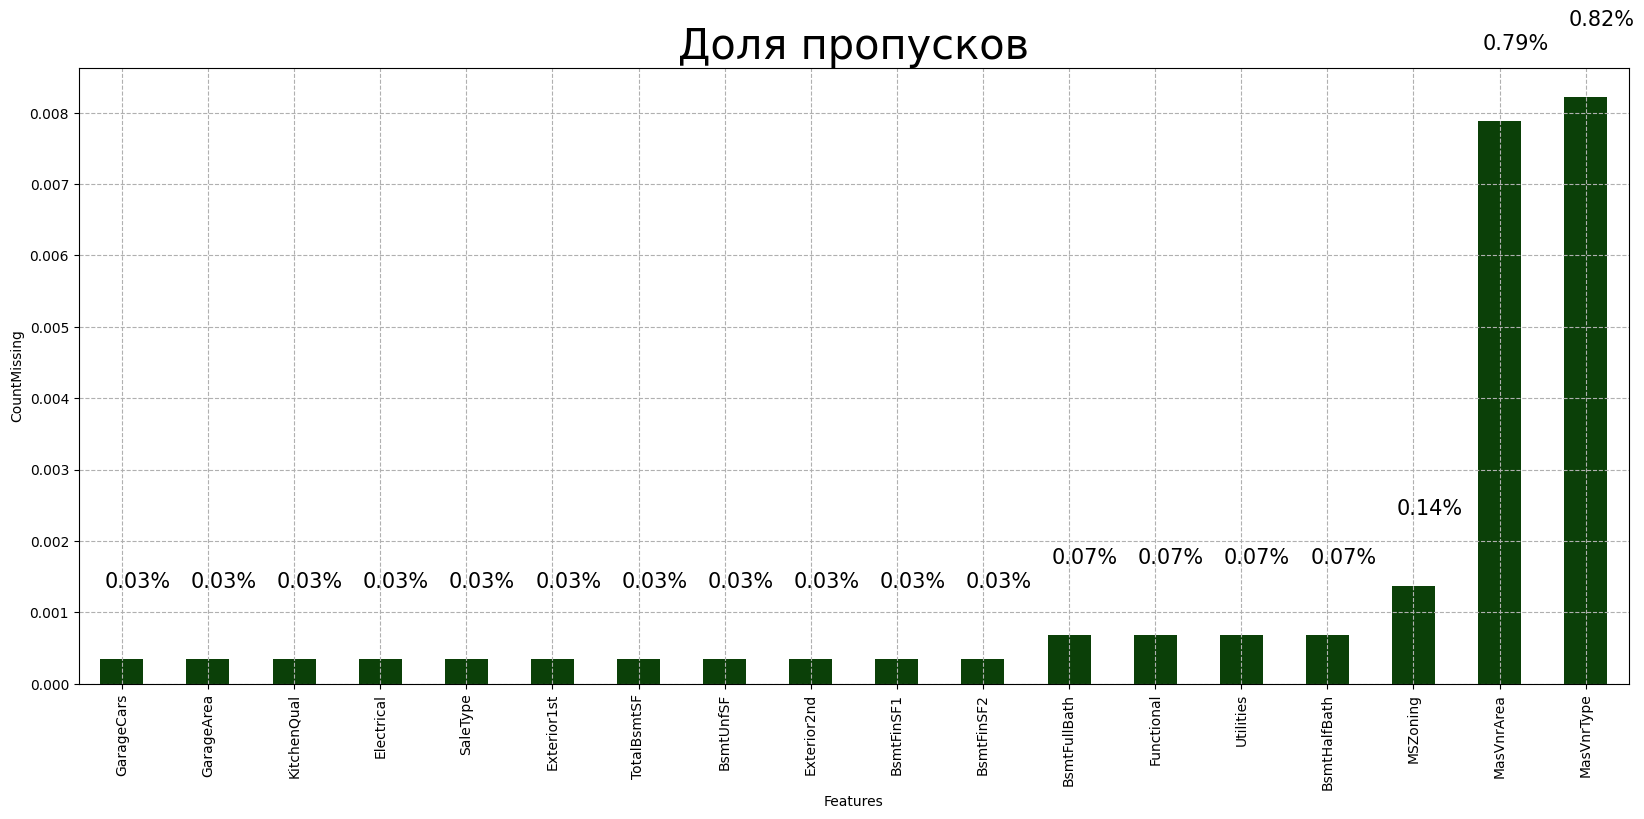

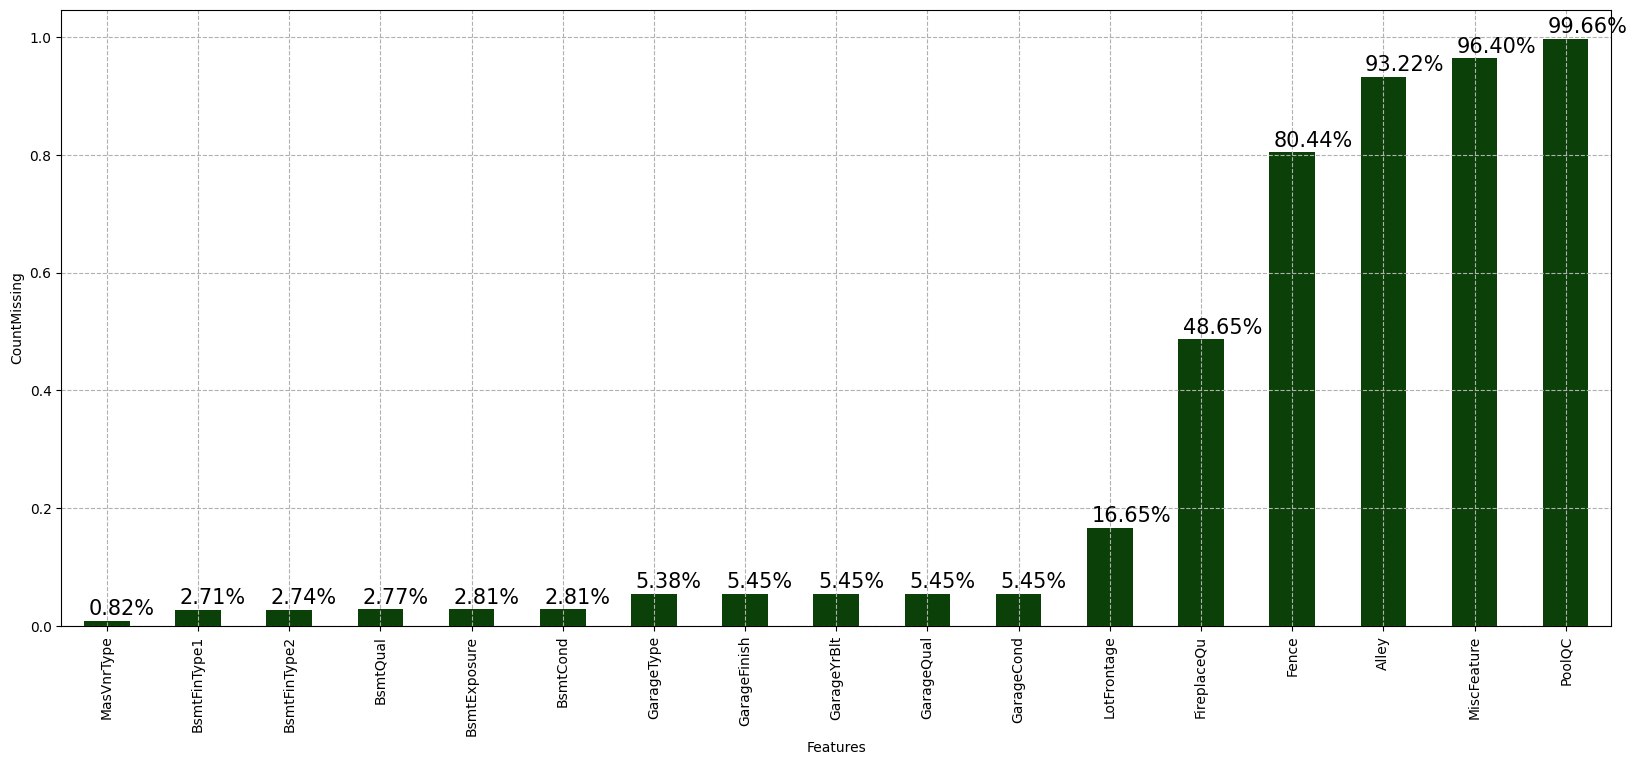

In [9]:
missing_by_col = pd.concat([df_train.drop('SalePrice', axis = 1), df_test]).isna().sum().sort_values() / (len(df_train) + len(df_test))
missing_by_col = missing_by_col[missing_by_col > 0]

missing_by_col_first = missing_by_col.head(len(missing_by_col)//2+1)
missing_by_col_second = missing_by_col.tail(len(missing_by_col)//2)

plt.figure(figsize=(20, 8))
plt.title('Доля пропусков', fontdict=dict(fontsize=30))
missing_by_col_first.plot(kind = 'bar', color='xkcd:hunter green')
plt.grid(True, which='both', linestyle='--')
plt.xlabel('Features')
plt.ylabel('CountMissing');

for index,data in enumerate(missing_by_col_first):
    plt.text(x=index - 0.2, y = data + 0.001, s=f"{data * 100:.{2}f}%" , fontdict=dict(fontsize=15))
plt.show();

plt.figure(figsize=(20, 8))
missing_by_col_second.plot(kind = 'bar', color='xkcd:hunter green')
plt.grid(True, which='both', linestyle='--')
for index,data in enumerate(missing_by_col_second):
    plt.text(x=index - 0.2, y = data + 0.01, s=f"{data * 100:.{2}f}%" , fontdict=dict(fontsize=15))
plt.xlabel('Features')
plt.ylabel('CountMissing');

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
В данных большое количество пропущенных значений, некоторые из которых составляют большую часть данных.

In [10]:
print('Total missing',missing_by_col.sum(), '\n')
print("Missing describe:")
missing_by_col.describe()

Total missing 4.784172661870503 

Missing describe:


count    34.000000
mean      0.140711
std       0.303934
min       0.000343
25%       0.000343
50%       0.008051
75%       0.054471
max       0.996574
dtype: float64

<div style="padding:15px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
    
- **BsmtSomeThing** отсутствуют, потому что в доме нет подвала;
- **Fence** отсутствует, потому что в доме нет забора;
- **PoolQC** отсутствует, потому что в доме нет бассейна;
- **Alley** отсутствует, потому что в доме нет подъезда;
- **MasVnrSomeThing** отсутствуют, потому что в доме нет облицовки стен;
- **FireplaceQu** отсутствует, потому что в доме нет камина;
- **GarageSomeThing** отсутствуют, потому что в доме нет гаража;
- **MiscFeature** отсутствует, потому что в доме нет разных дополнительных функций;
- Остальные столбцы будут заполнены методом KNNImputing после кодирования.

In [11]:
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self): pass

    def fit(self, X, y=None):
        X = X[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'BsmtExposure',
               'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'GarageFinish',
               'GarageQual', 'GarageCond', 'GarageType', 'MasVnrType', 'MSZoning', 
               'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st',
               'SaleType', 'Electrical', 'KitchenQual', 'GarageCars', 'GarageCars']]
        
        self.categ_misisng = X.select_dtypes(include=['object']).columns.tolist()
        self.numeric_missing = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        
        return self

    def transform(self, X):
        
        X = X.replace('NA', 'none')
        X = X.replace("No", 'none')
        for col in self.categ_misisng:
            X[col] = X[col].fillna('none')
        for col in self.numeric_missing:
            X[col] = X[col].fillna(0)
            
        X['PoolQC'].loc[(X['PoolArea'] > 0) & (X['PoolQC'] == 'none')] = 'none'
        X['MiscFeature'].loc[(X['MiscVal'] > 0) & (X['MiscFeature'] == 'none')] = 'none'
        X['MasVnrType'].loc[(X['MasVnrArea'] == 0) & ~(X['MasVnrType'] == 'none')] = 'none'
        return X

In [12]:
class CustomKNNImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer = KNNImputer(n_neighbors=10)
        
    def fit(self, X, y = None):
        self.num_columns = X.drop("SalePrice", axis= 1).select_dtypes(include=['int64', 'float64']).columns.tolist()
        self.imputer.fit(X[self.num_columns])
        return self
    
    def transform(self, X, y = None):
        SalePrice = None
        if "SalePrice" in X.columns:
            SalePrice = X.SalePrice
            X = X.drop("SalePrice", axis = 1)
        X[self.num_columns] = self.imputer.transform(X[self.num_columns])
        
        if SalePrice is not None:
            return X.join(SalePrice)
        return X

In [13]:
Imputing = Pipeline([('Imputer_1', Imputer()), ("Imputer_2", CustomKNNImputer())])
df_train = Imputing.fit_transform(df_train)

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Обработка числовых данных.
</div>

In [14]:
num_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [15]:
df_train[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,70.838973,23.350125,21.0,60.00,70.0,81.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,104.135137,180.996498,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


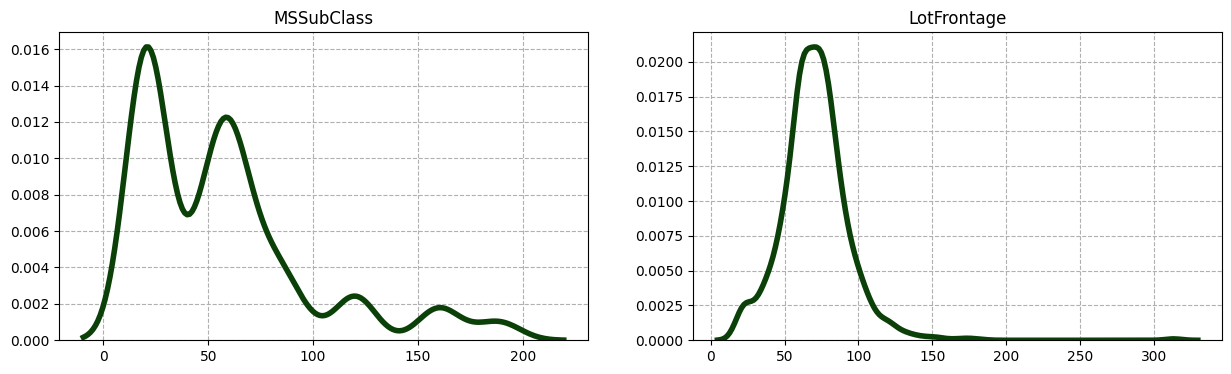

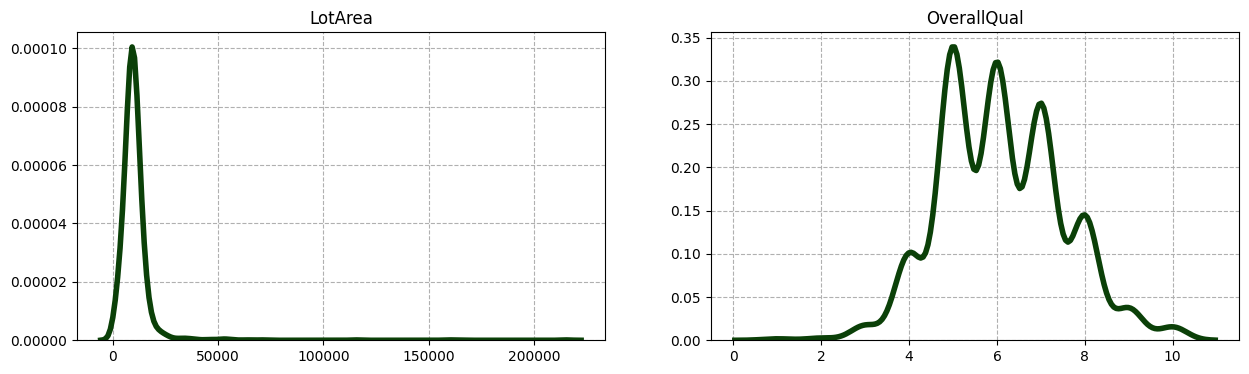

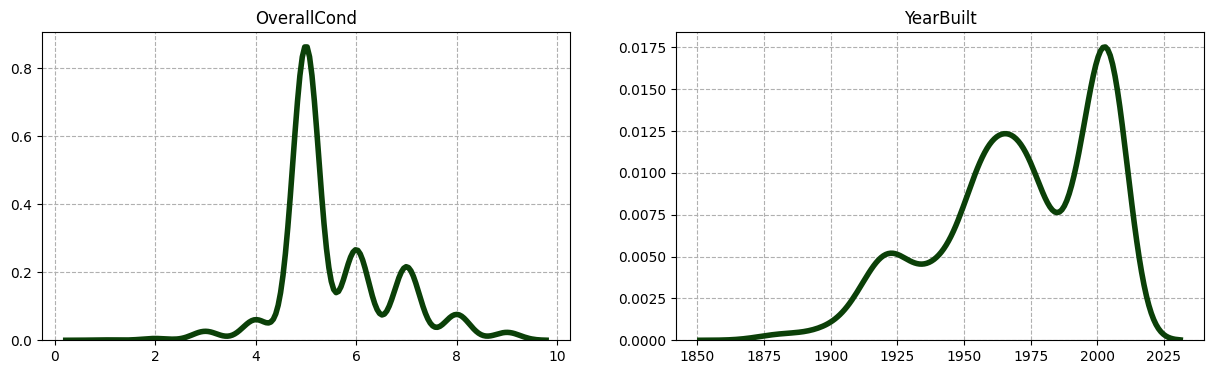

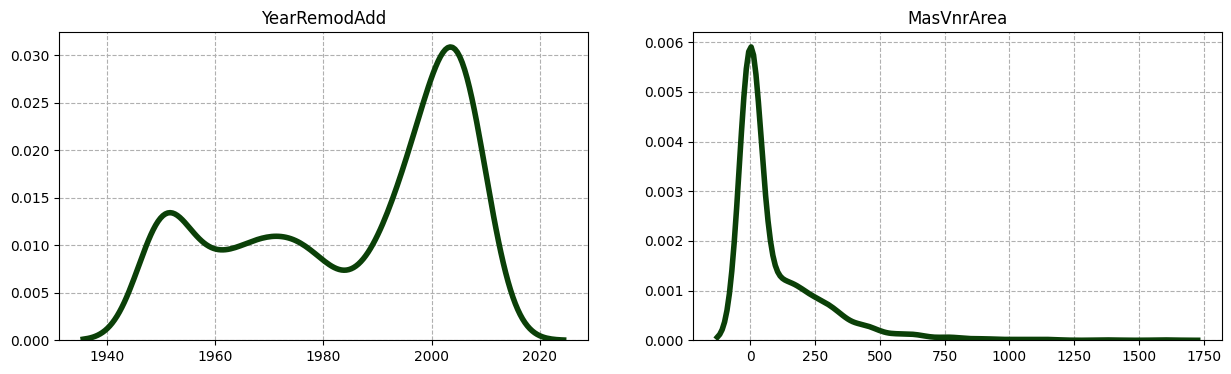

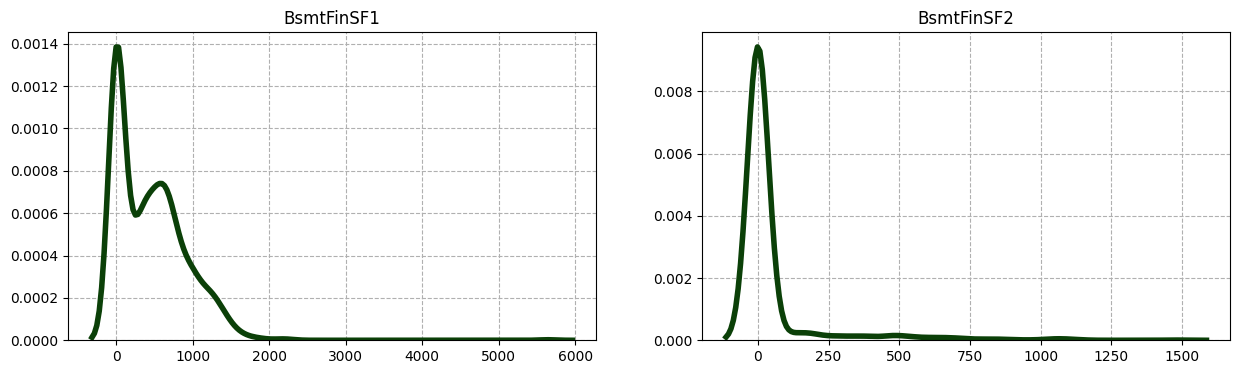

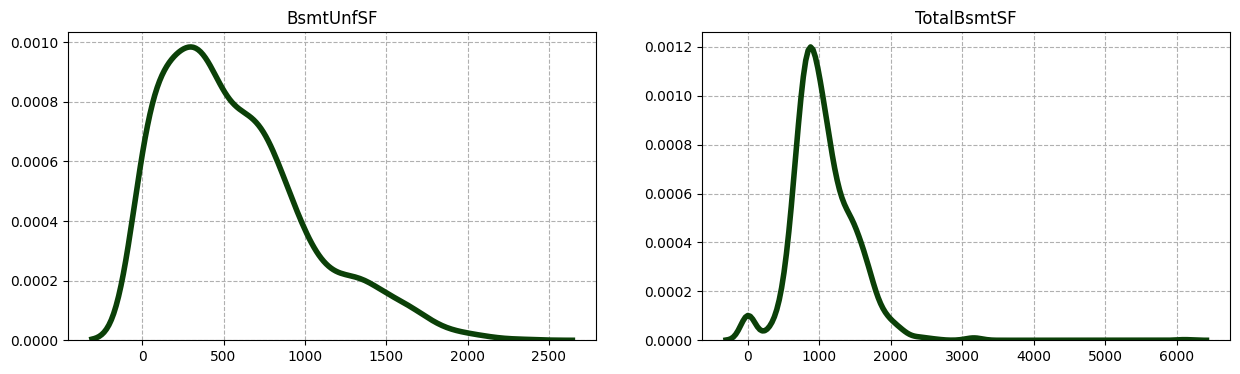

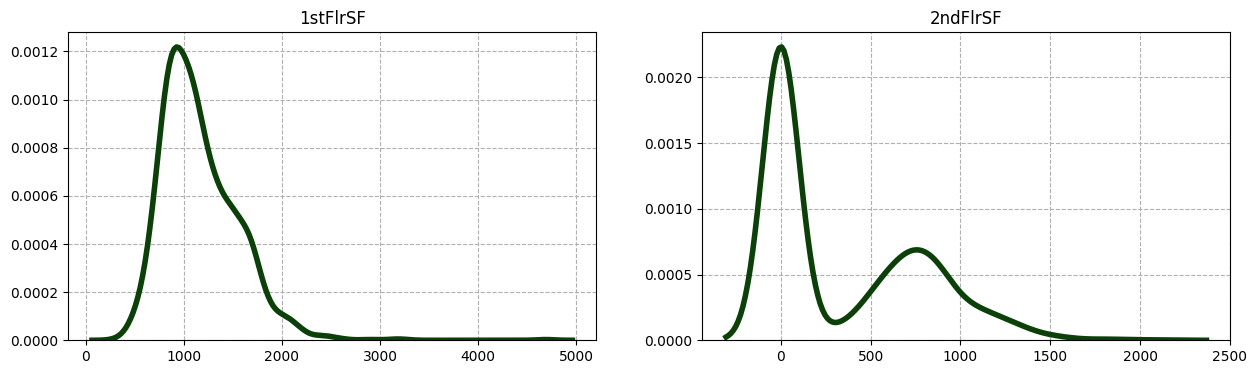

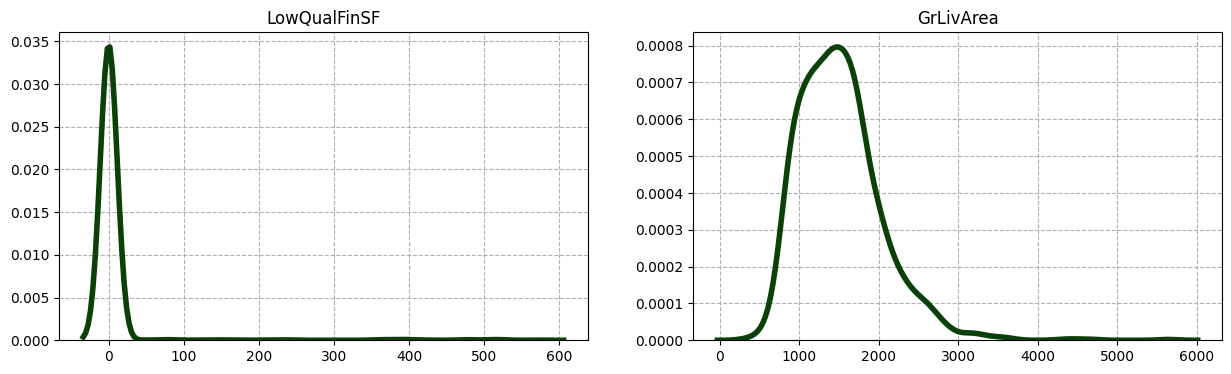

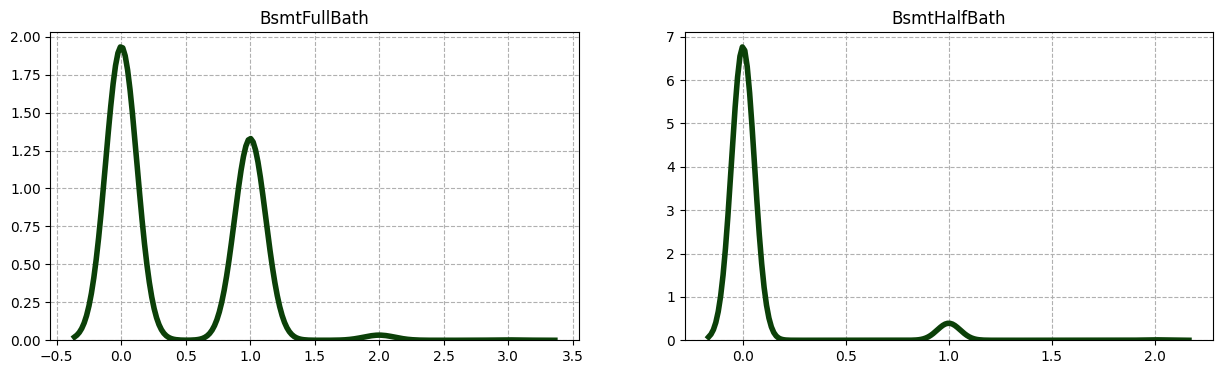

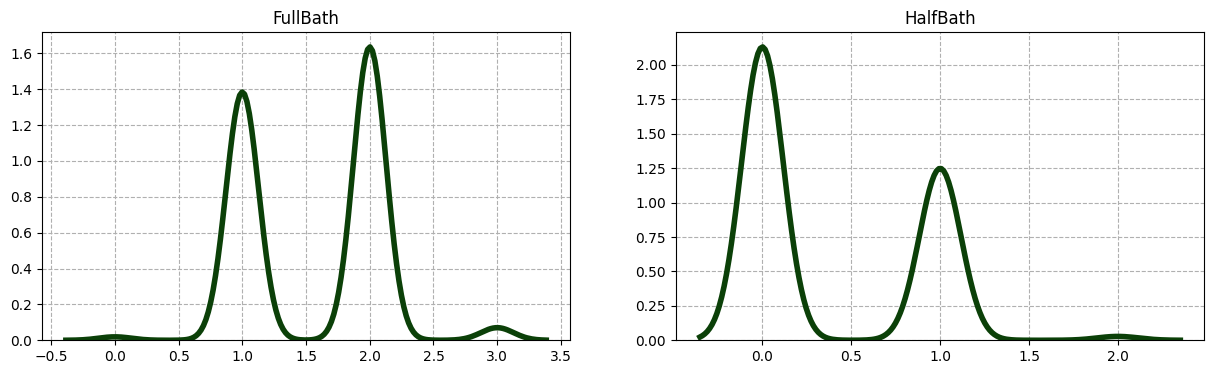

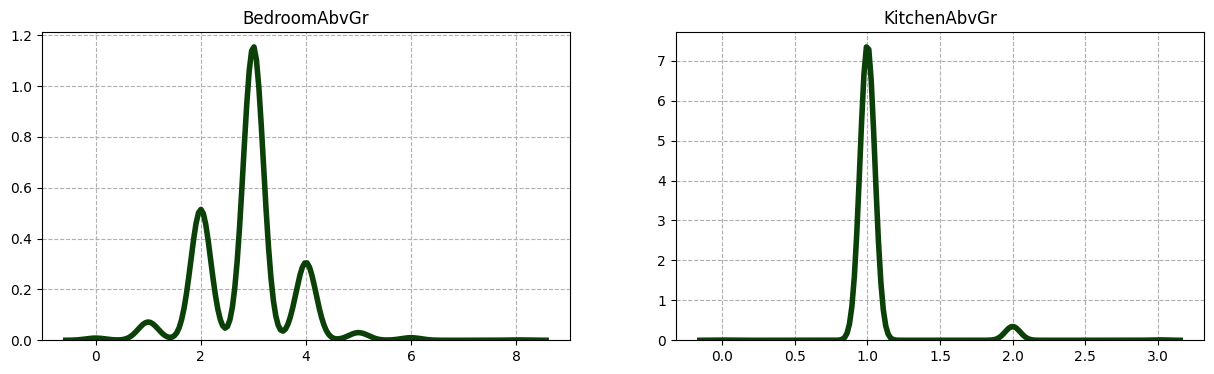

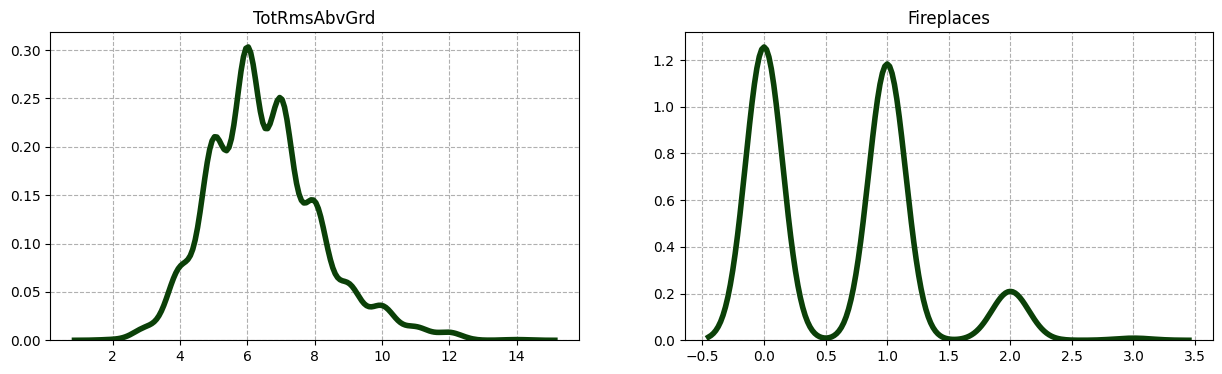

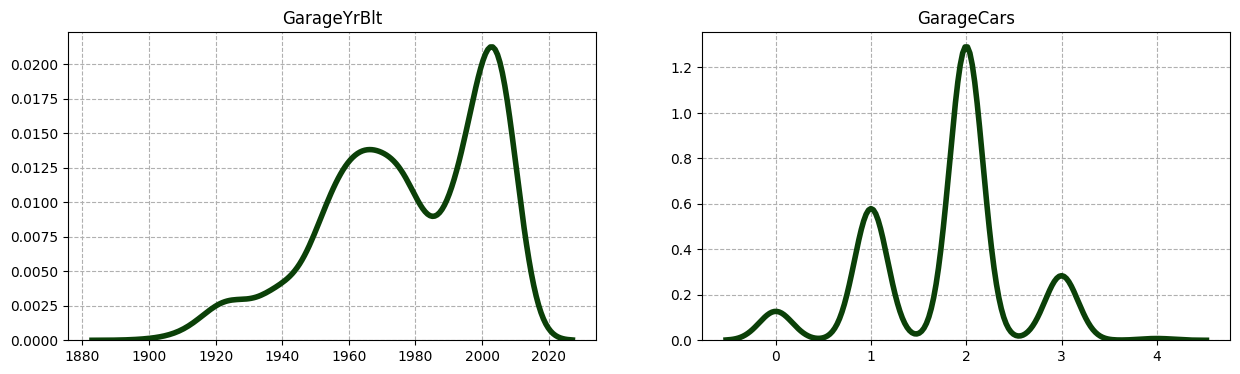

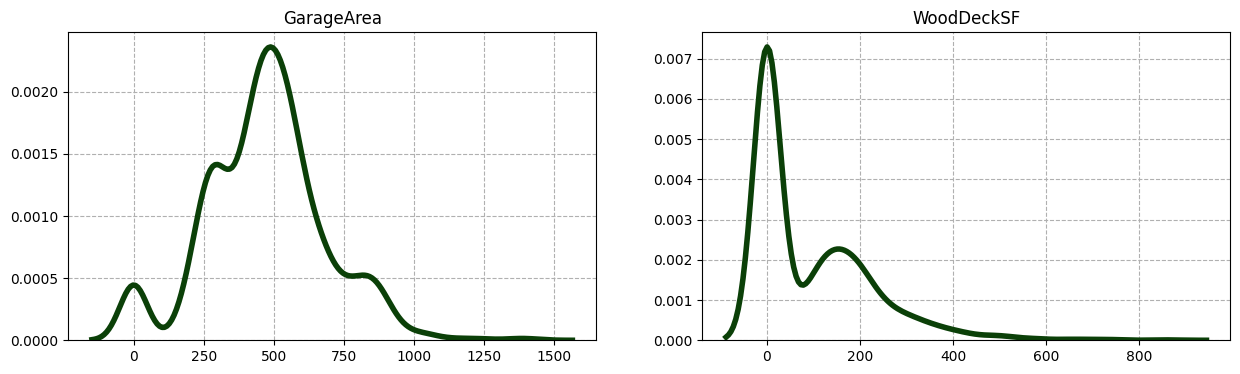

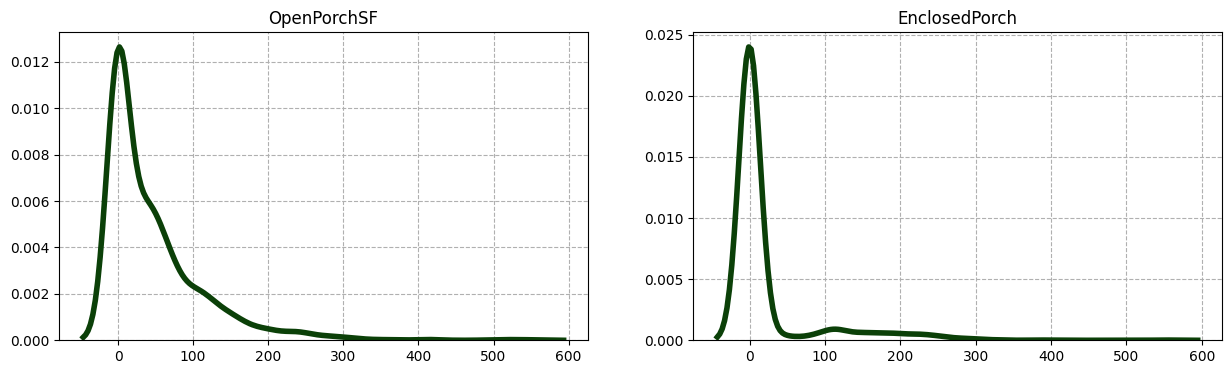

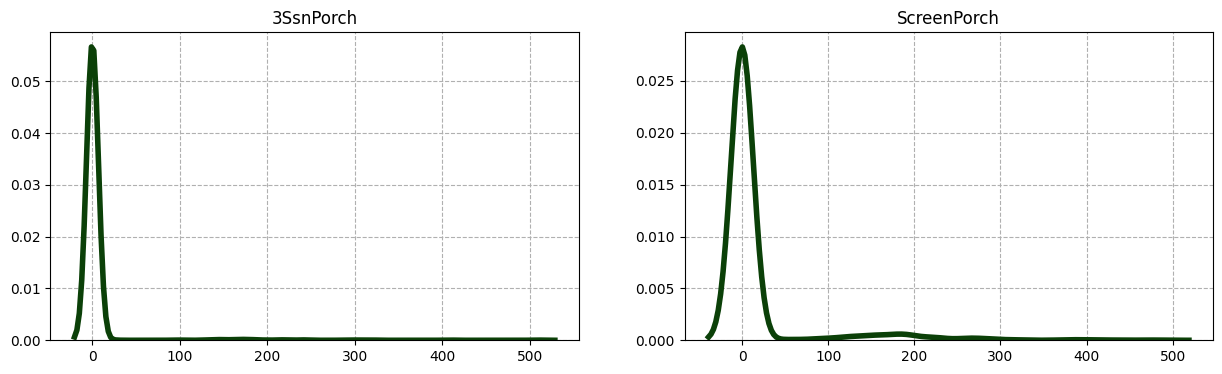

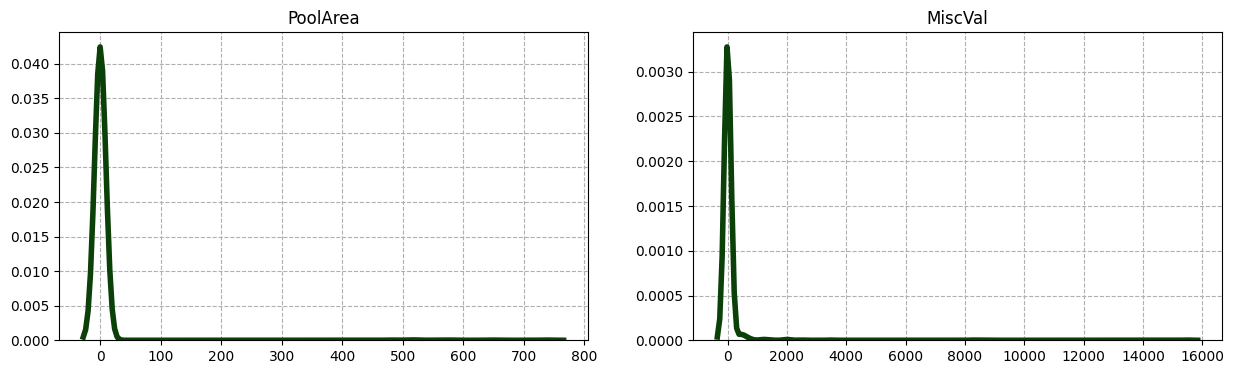

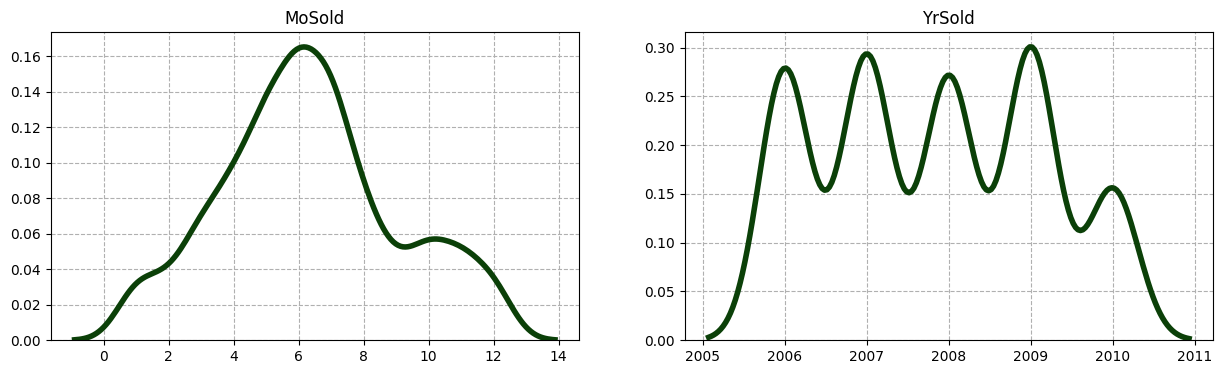

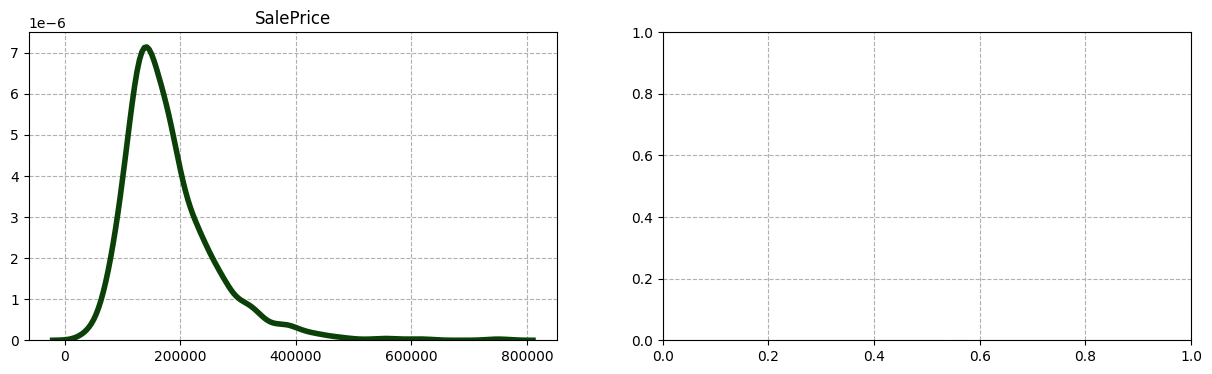

In [16]:
for name_id in range(0, len(num_columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=False, sharex=False)

    sns.kdeplot(
        df_train,
        x=num_columns[name_id],
        color='xkcd:hunter green',
        ax=axes[0],
        linewidth=4,
    )
    axes[0].set_title(num_columns[name_id])

    try:
        sns.kdeplot(
            df_train,
            x=num_columns[name_id + 1],
            color='xkcd:hunter green',
            ax=axes[1],
            linewidth=4,
        )
        axes[1].set_title(num_columns[name_id + 1])

    except:
        pass

    for ax in axes:
        ax.grid(True, which='both', linestyle='--')
        ax.set(xlabel='', ylabel='')

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;">

Посмотрим на коэфициент ассиметрии(skew).

In [17]:
skew_and_min = pd.DataFrame([df_train[num_columns].skew(),
                             df_train[num_columns].min()]).T
skew_and_min.columns = ['skew', 'min']
skew_and_min[(skew_and_min['skew'] > 1) & (skew_and_min['min'] >= 0)]

,skew,min
MSSubClass,1.407657,20.0
LotFrontage,1.945640,21.0
LotArea,12.207688,1300.0
MasVnrArea,2.658523,0.0
BsmtFinSF1,1.685503,0.0
BsmtFinSF2,4.255261,0.0
TotalBsmtSF,1.524255,0.0
1stFlrSF,1.376757,334.0
LowQualFinSF,9.011341,0.0
GrLivArea,1.366560,334.0


<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;">
    
Некоторые столбцы асиметричны, поэтому в дальнейшем применим метод PowerTransform.

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Обработка категориальных признаков.
</div>

In [18]:
categ_columns = df_train.select_dtypes(include=['object']).columns.tolist()

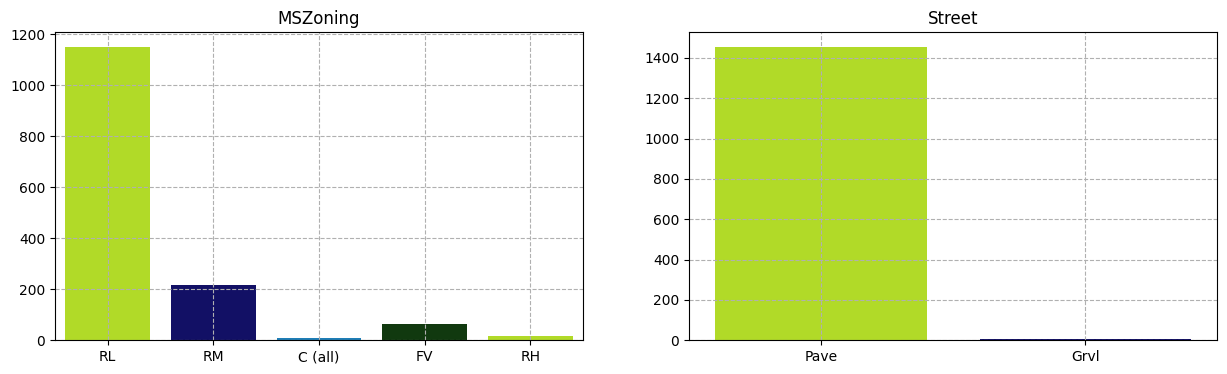

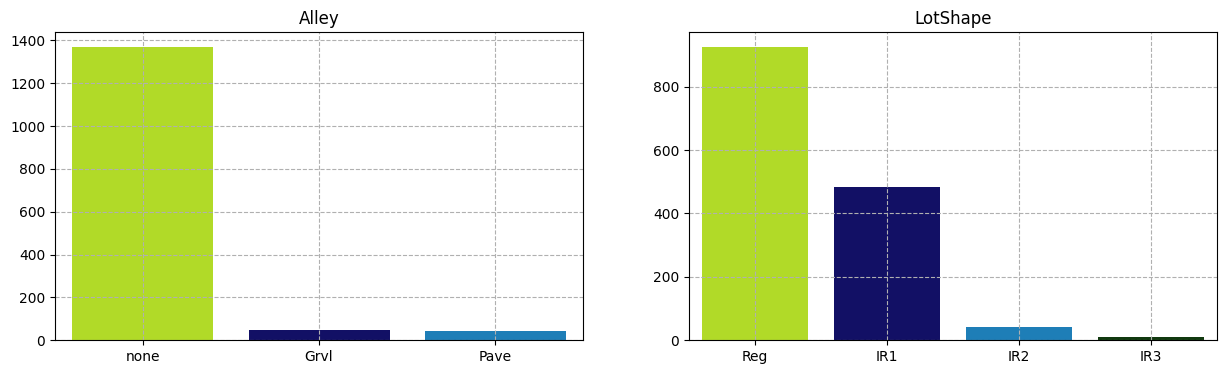

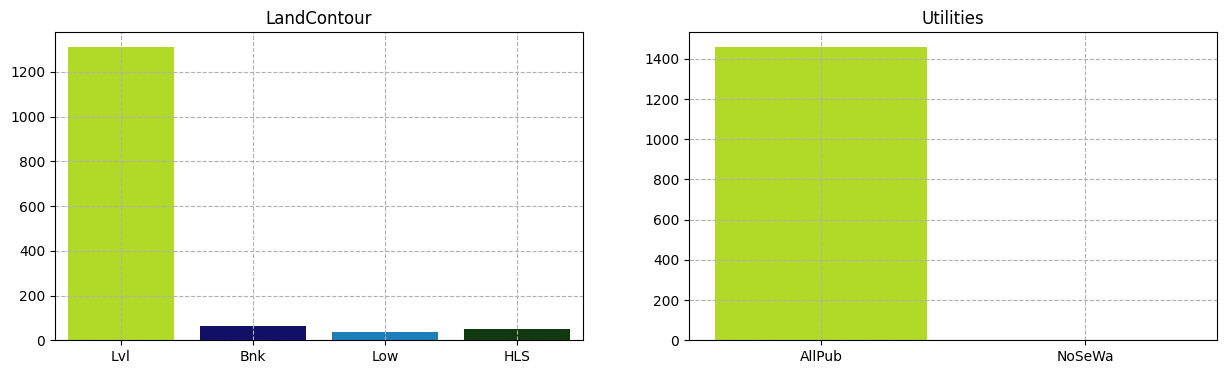

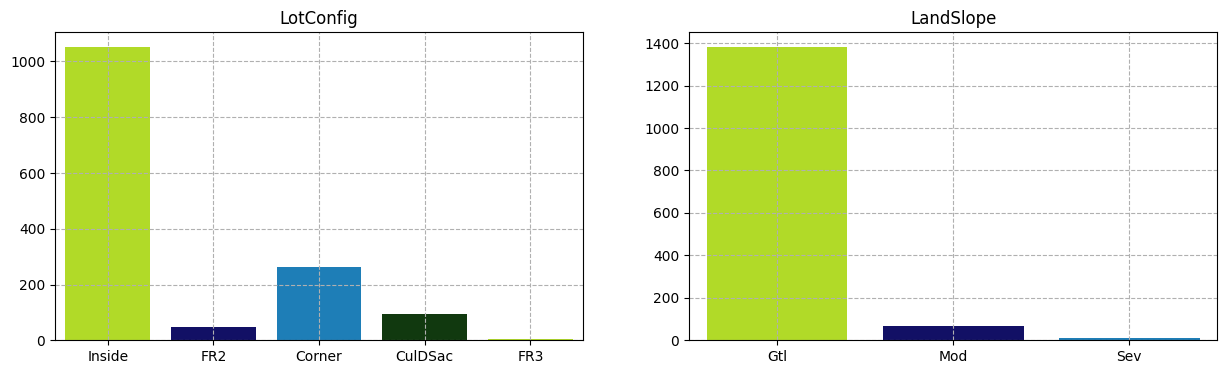

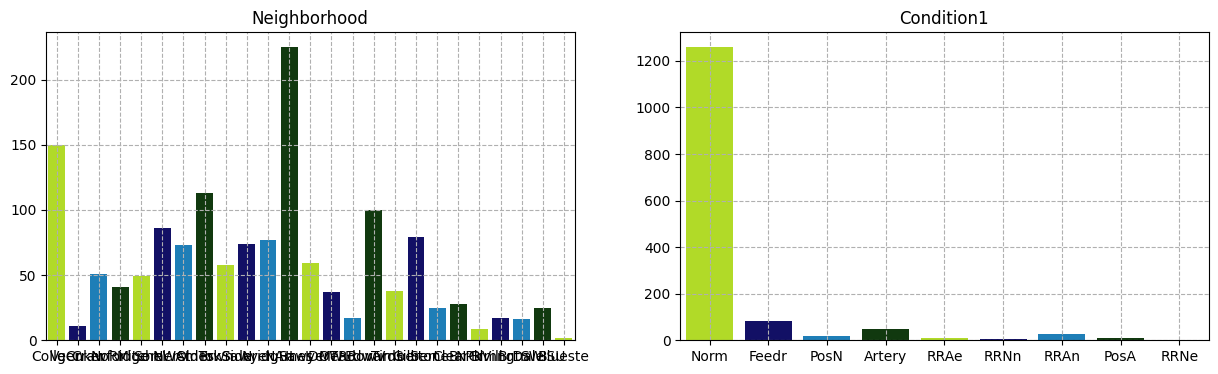

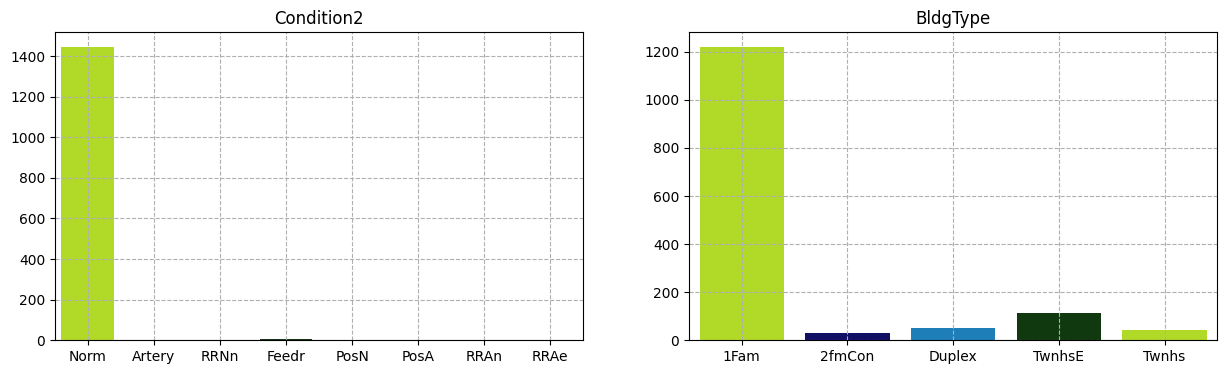

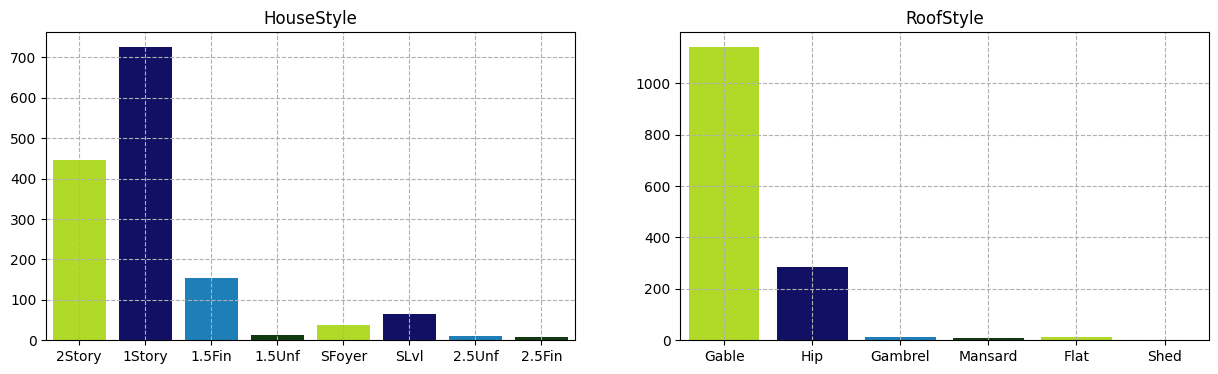

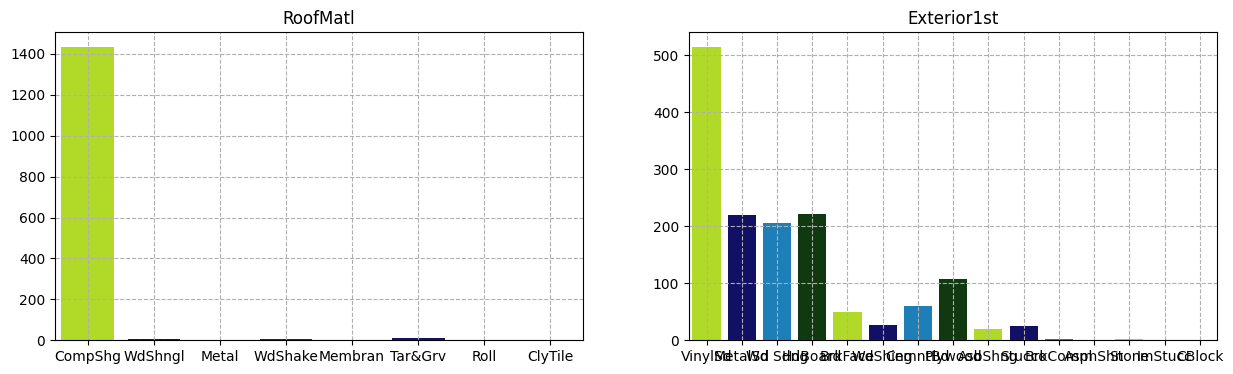

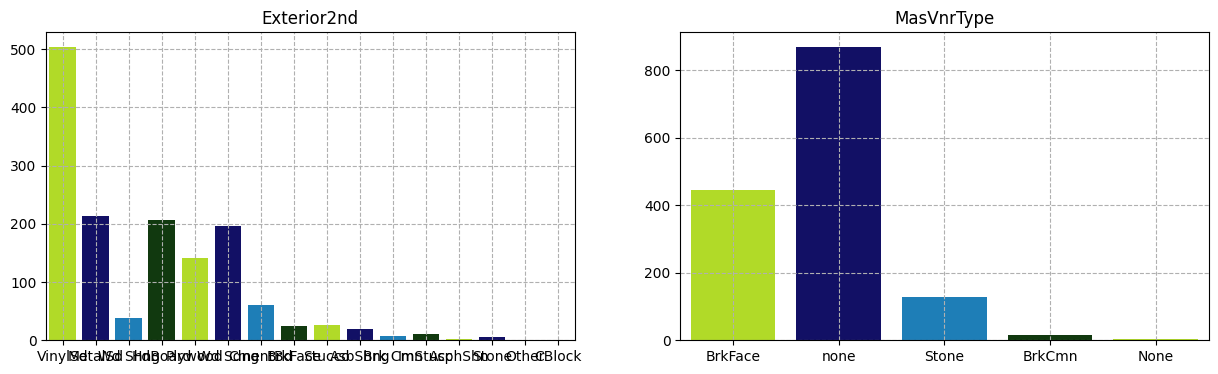

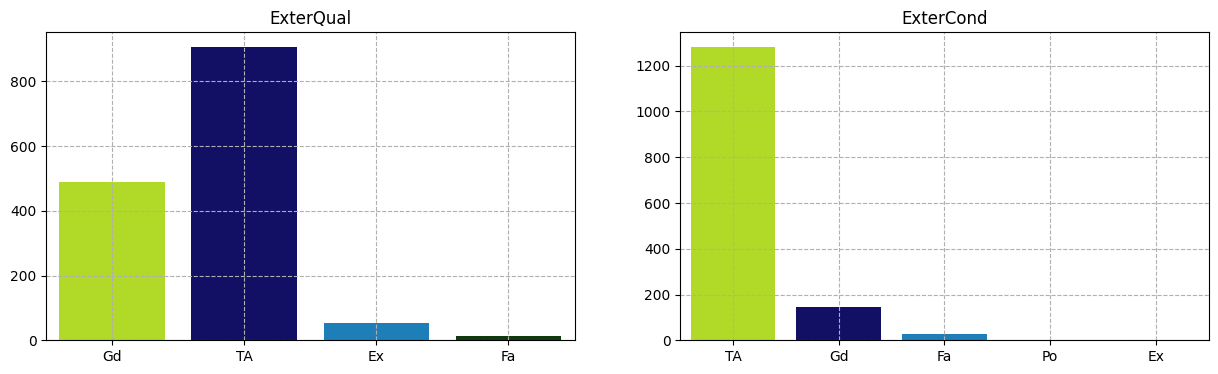

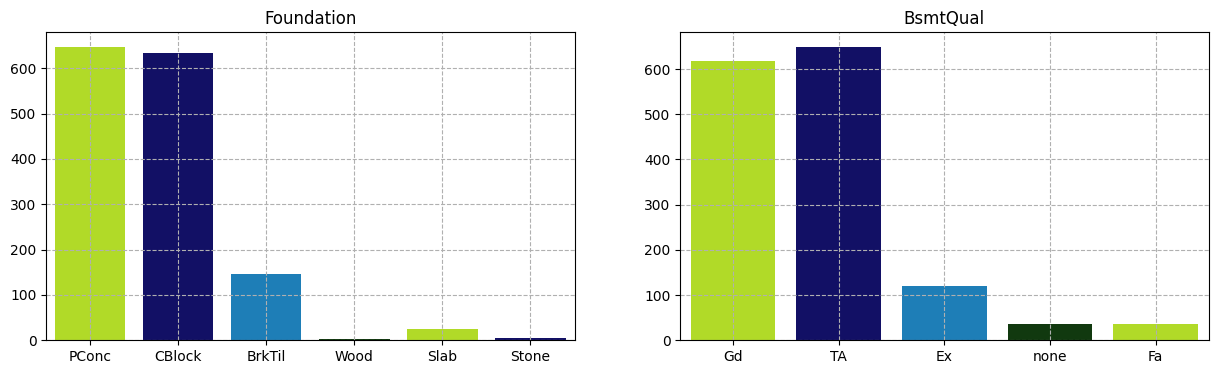

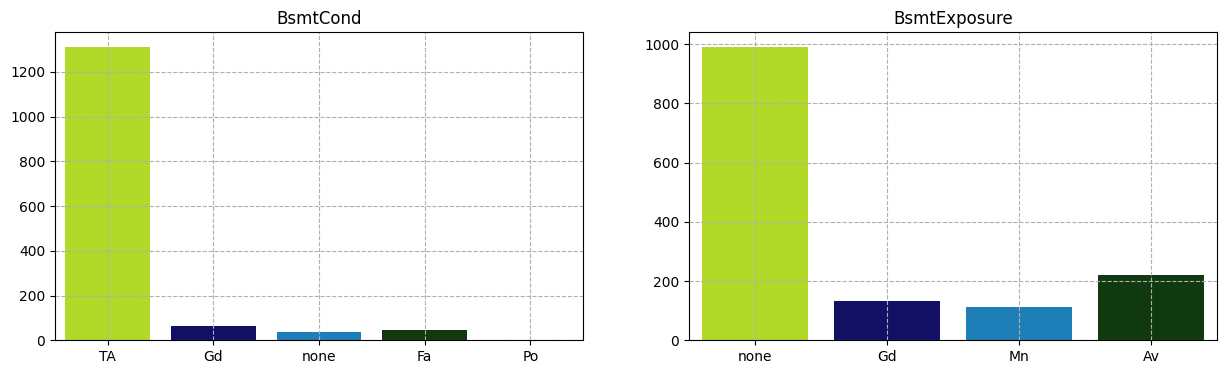

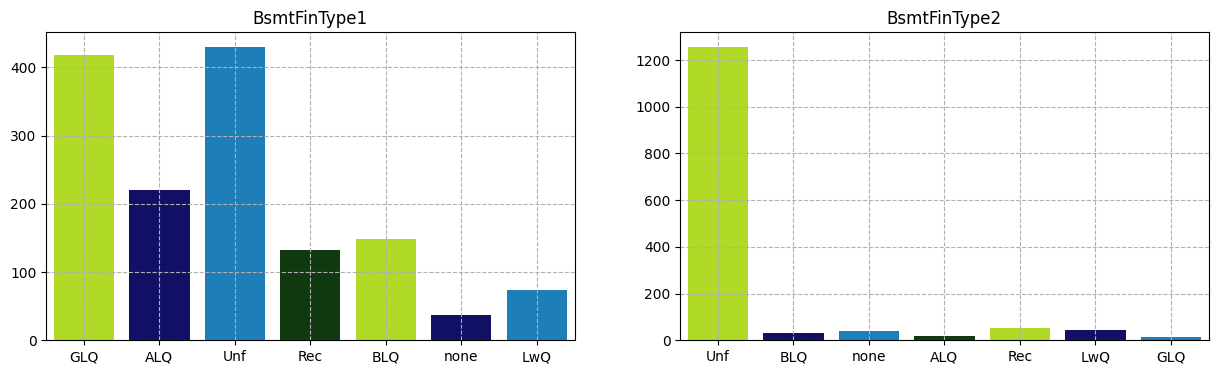

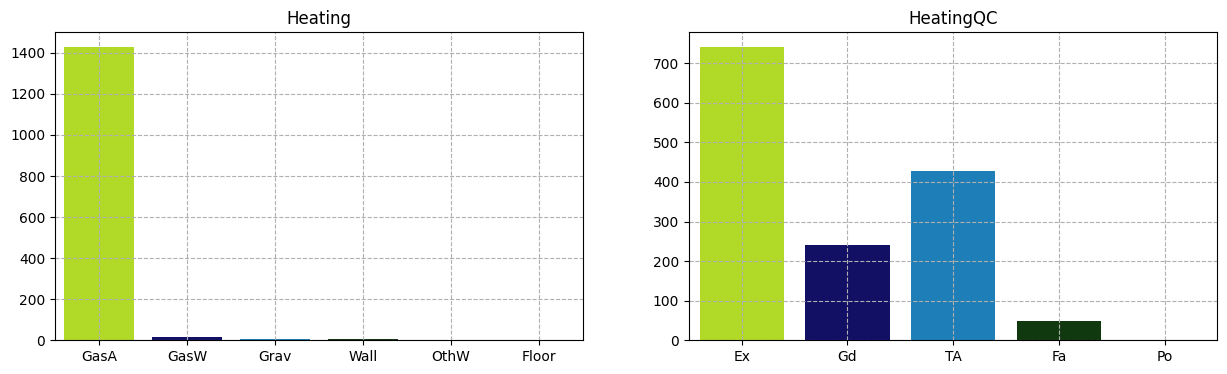

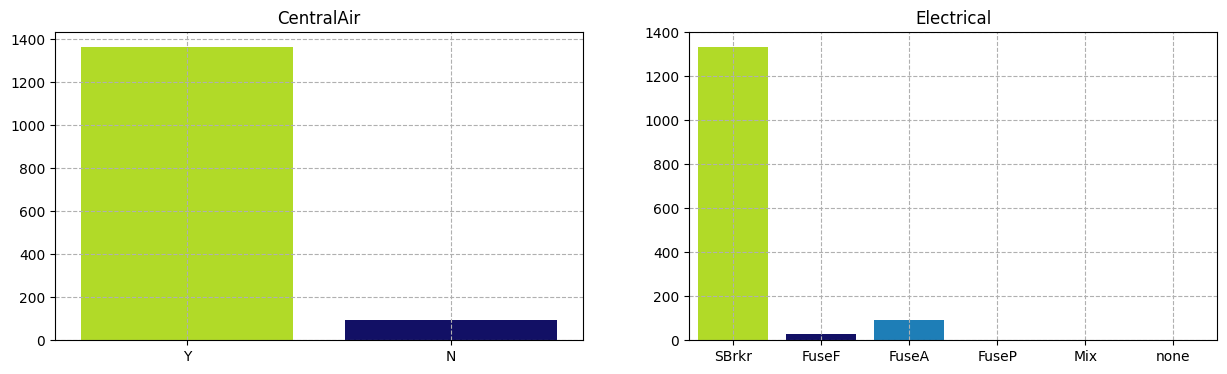

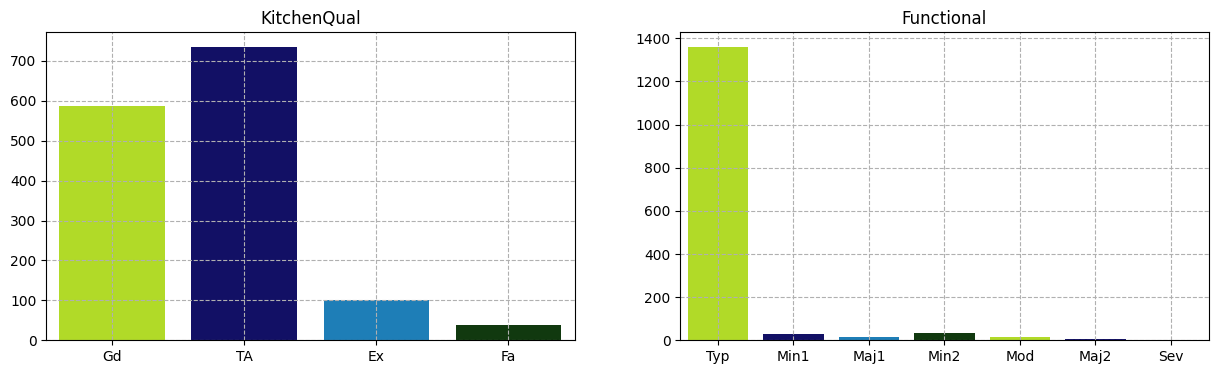

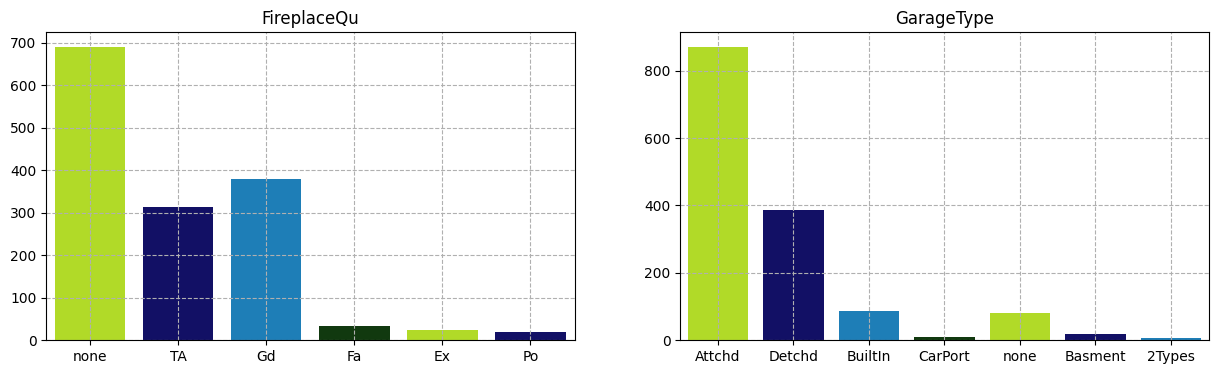

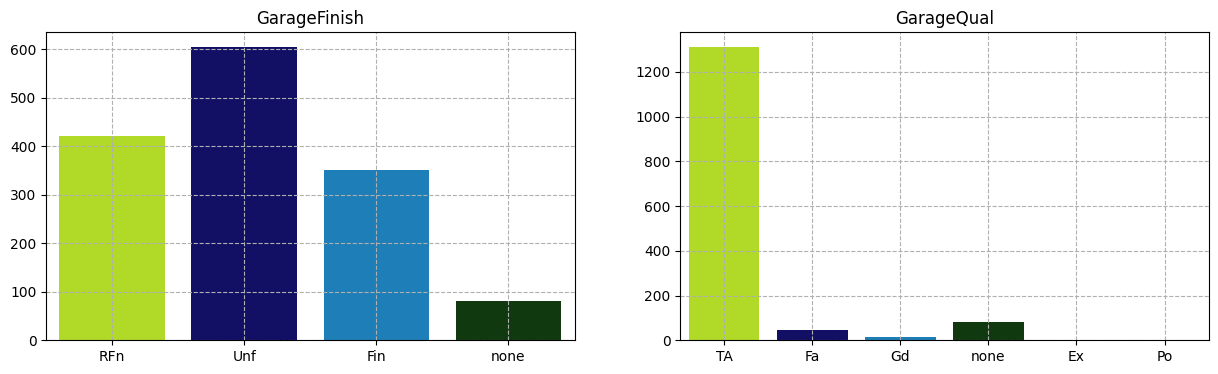

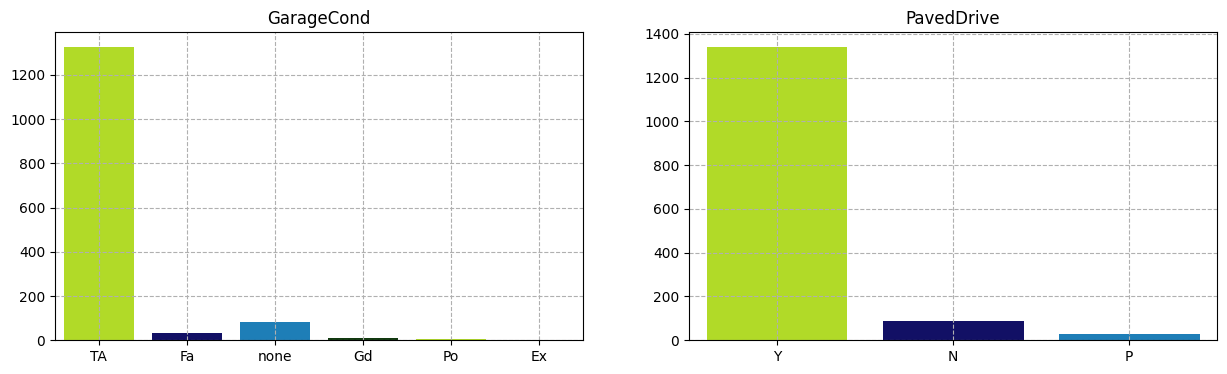

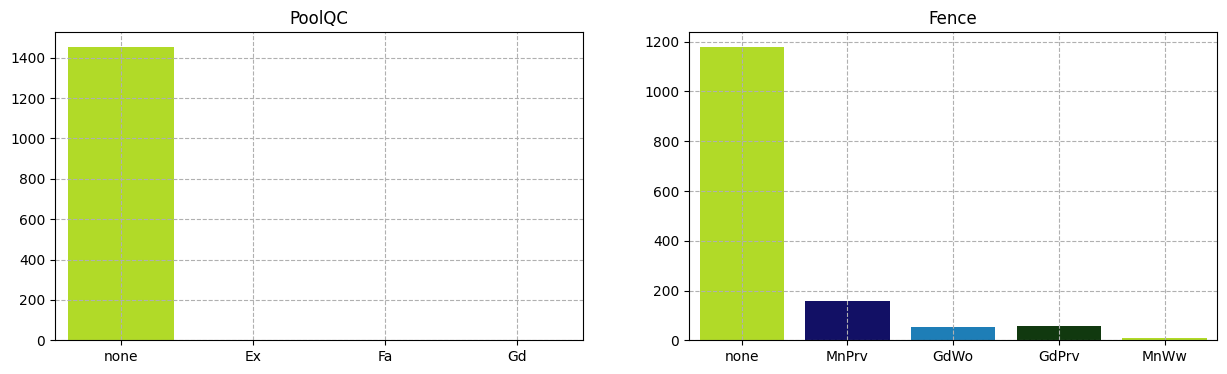

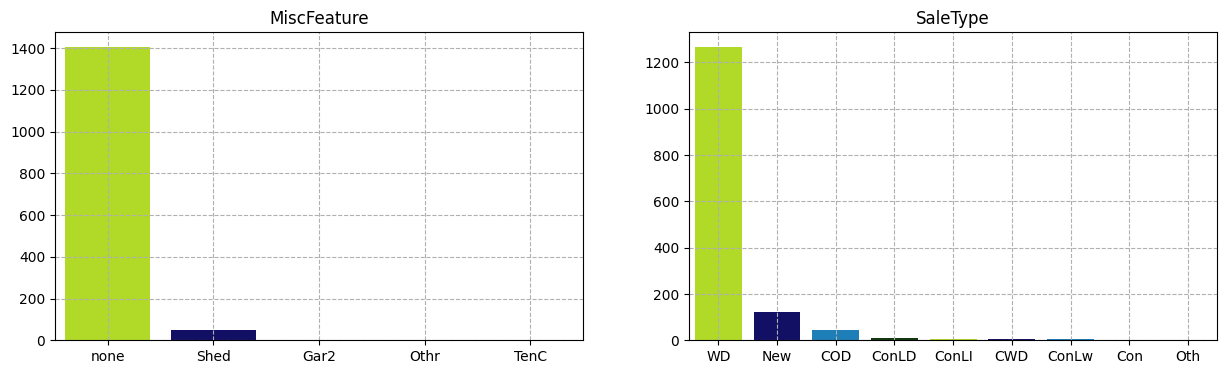

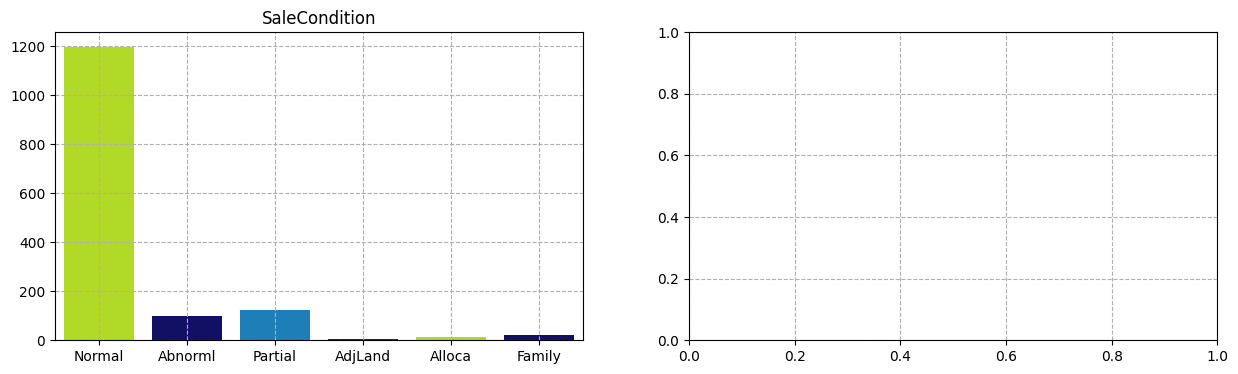

In [19]:
for name_id in range(0, len(categ_columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=False, sharex=False)

    sns.countplot(
        df_train,
        x=categ_columns[name_id],
        palette=['xkcd:chartreuse', 
                 'xkcd:deep blue',
                 'xkcd:cerulean',
                 'xkcd:hunter green'],
        ax=axes[0],
    )
    axes[0].set_title(categ_columns[name_id])
    try:
        sns.countplot(
            df_train,
            x=categ_columns[name_id + 1],
            palette=['xkcd:chartreuse', 
                 'xkcd:deep blue',
                 'xkcd:cerulean',
                 'xkcd:hunter green'],
            ax=axes[1],
        )
        axes[1].set_title(categ_columns[name_id + 1])
    except:
        pass

    for ax in axes:
        ax.grid(True, which='both', linestyle='--')
        ax.set(xlabel='', ylabel='')

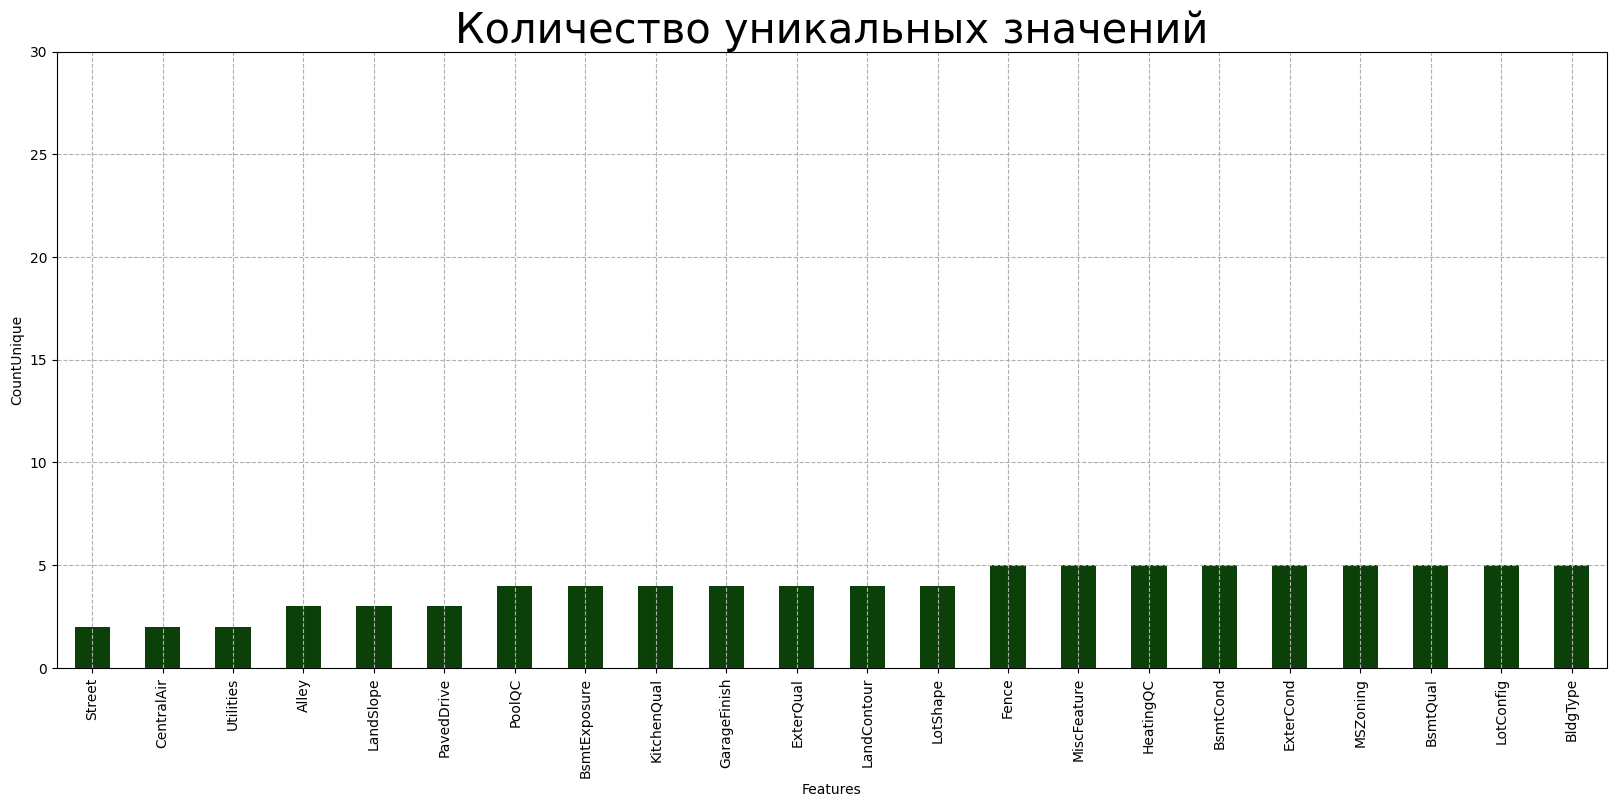

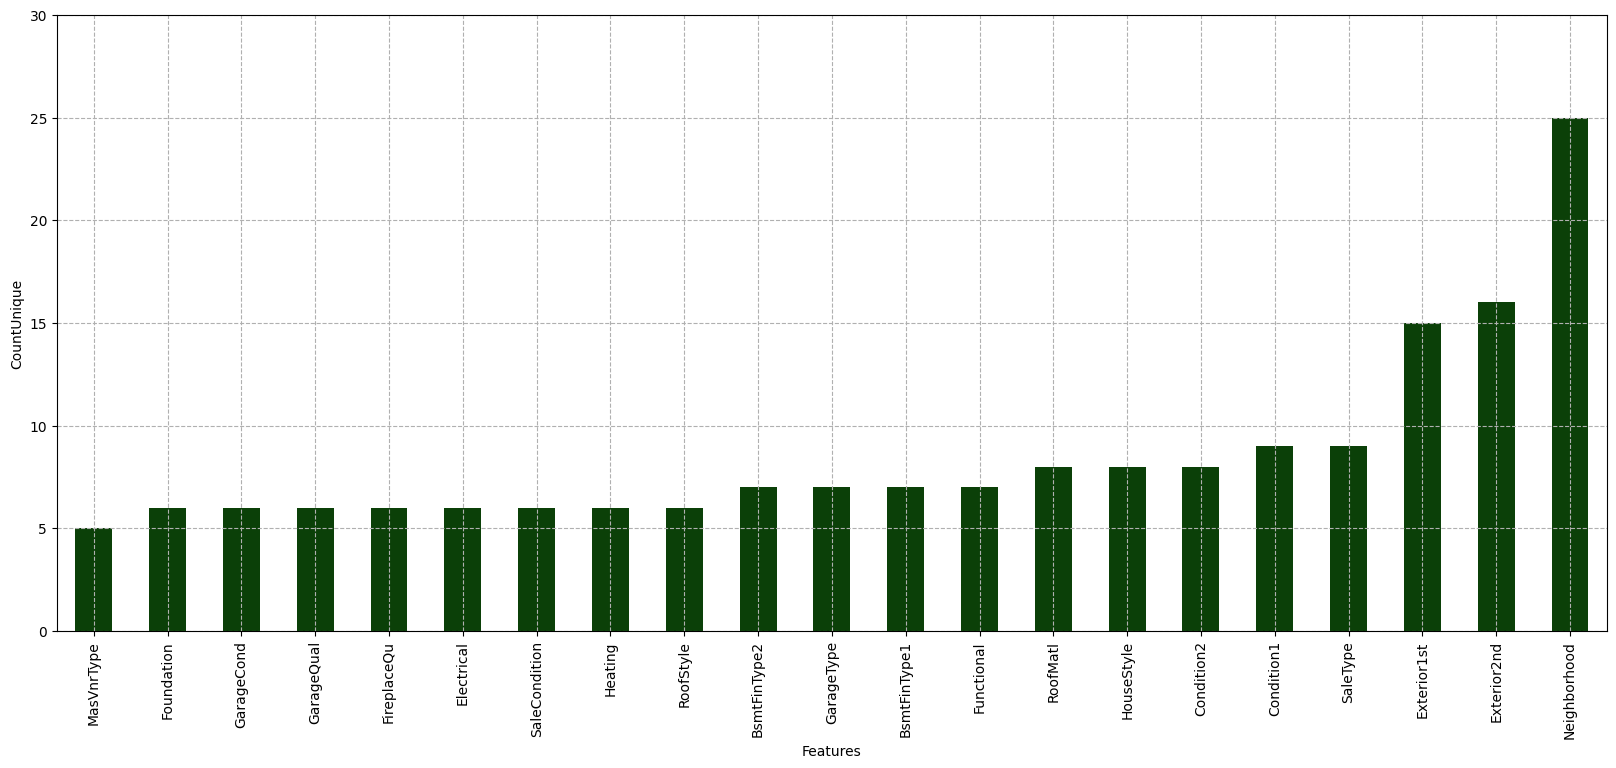

In [20]:
unique_by_col = df_train[categ_columns].nunique().sort_values()

unique_by_col_first = unique_by_col.head(len(unique_by_col)//2+1)
unique_by_col_second = unique_by_col.tail(len(unique_by_col)//2)

plt.figure(figsize=(20, 8))
plt.title('Количество уникальных значений', fontdict=dict(fontsize=30))
unique_by_col_first.plot(kind = 'bar', color='xkcd:hunter green')
plt.grid(True, which='both', linestyle='--')
plt.xlabel('Features')
plt.ylabel('CountUnique')
plt.ylim(0, 30)
plt.show();


plt.figure(figsize=(20, 8))
unique_by_col_second.plot(kind = 'bar', color='xkcd:hunter green')
plt.grid(True, which='both', linestyle='--')
plt.xlabel('Features')
plt.ylim(0, 30)
plt.ylabel('CountUnique');

<div style="padding:15px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
    
Состояния будут закодированы вручную.

Оставшиеся категориальные признаки будут закодированы с помощью кодировщика CatBoost.

<div style="padding:15px 40px 5px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 

**ExterCond, PoolQC, ExterQual, GarageCond, GarageQual, FireplaceQu, KitchenQual, HeatingQC, BsmtCond, BsmtQual, ExterCond**:
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Оценка | Расшифорвка(значение для кодировки)
- ex | Excellent(5)
- gd | Good(4)
- ta | Average(3)
- fa | Fair(2)
- po | Poor(1)
- none | No(0)

In [21]:
class CustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self): pass

    def fit(self, X, y=None):

        y = X['SalePrice']
        X = X.drop('SalePrice', axis=1)

        self.codition_columns = ['ExterCond', 'BsmtCond',
                                 'BsmtQual', 'HeatingQC',
                                 'KitchenQual', 'PoolQC',
                                 'FireplaceQu', 'GarageQual',
                                 'GarageCond', 'ExterQual']

        X = X.select_dtypes(include=['object']).drop(
            self.codition_columns, axis=1)

        self.other_columns = X.columns

        self.encoder = CatBoostEncoder()
        self.encoder.fit(X, y)
        
        return self

    def transform(self, X, y=None):
        for col in X.columns:
            
            if X[col].dtype == "O":
                X[col] = X[col].str.strip().str.lower()

        replacing_dict = {"ex": 5, "gd": 4, 
                          "ta": 3, "fa": 2,
                          "po": 1, "none": 0}

        mapping = {elem: replacing_dict for elem in self.codition_columns}

        X[self.other_columns] = self.encoder.transform(X[self.other_columns])
        X = X.replace(mapping)
        return X


Encoder = Pipeline([('Encoder', CustomEncoder())])
df_train = Encoder.fit_transform(df_train)

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Корреляции.
</div>

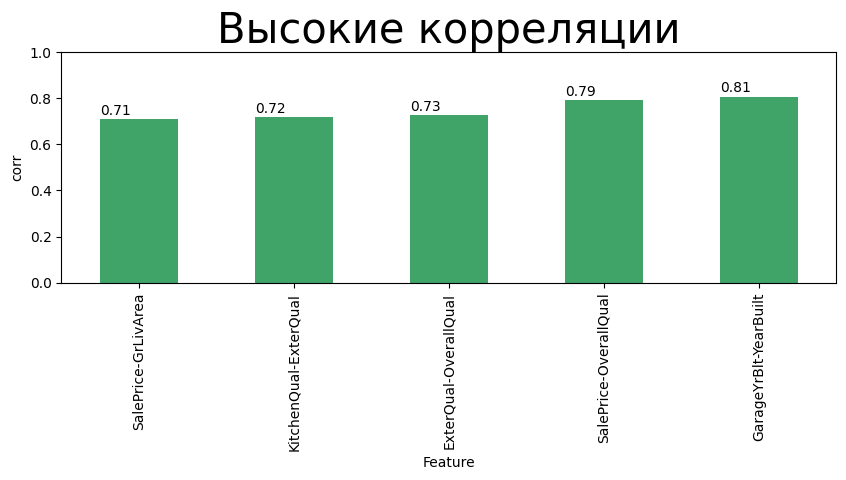

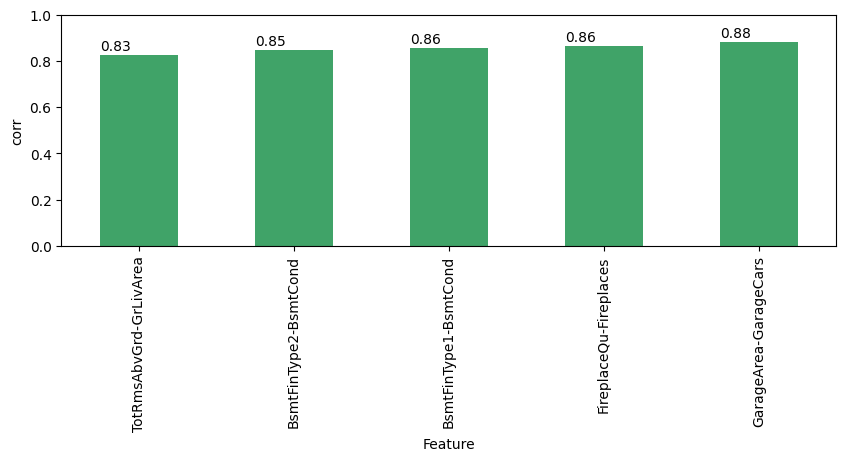

In [22]:
corr_matrix = df_train.corr()
dictinoty = {}
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        if corr_matrix.iloc[:, i].name == corr_matrix.iloc[j, :].name:
            break
        if 0.9 > abs(corr_matrix.iloc[j, i]) > 0.7:
            dictinoty[f'{corr_matrix.iloc[:, i].name}-{corr_matrix.iloc[j, :].name}'] = abs(corr_matrix.iloc[j, i])
            
height_corr = pd.Series(dictinoty).sort_values()

plt.figure(figsize=(10,3))
plt.title('Высокие корреляции', fontdict=dict(fontsize=30))
height_corr.head(len(height_corr) // 2).plot(kind = 'bar', color = 'xkcd:greenish')

for index,data in enumerate(height_corr.head(len(height_corr) // 2)):
    plt.text(x=index - 0.25, y = data + 0.02, s=f"{data:.{2}f}" , fontdict=dict(fontsize=10))
    
plt.xlabel('Feature')
plt.ylabel('corr')
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(10,3))
height_corr.tail(len(height_corr) // 2).plot(kind = 'bar', color = 'xkcd:greenish')

for index,data in enumerate(height_corr.tail(len(height_corr) // 2)):
    plt.text(x=index - 0.25, y = data + 0.02, s=f"{data:.{2}f}" , fontdict=dict(fontsize=10))
    
plt.xlabel('Feature')
plt.ylabel('corr')
plt.ylim(0,1)
plt.show()

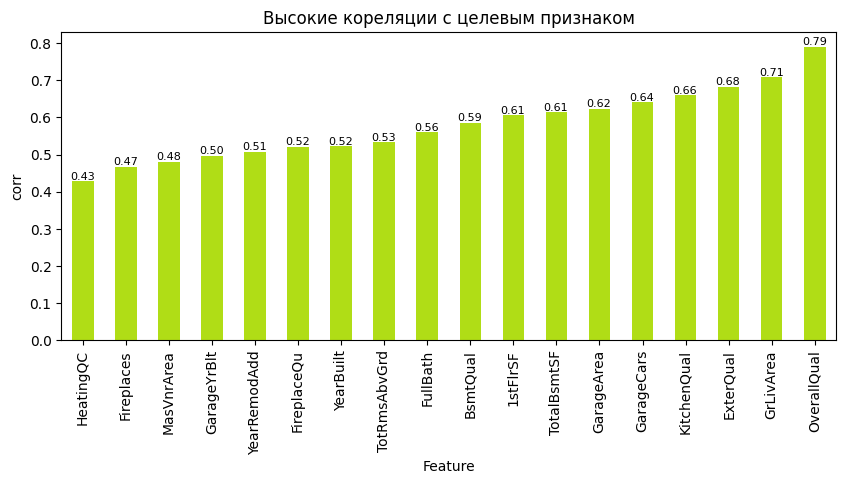

In [23]:
target_corr = df_train.corrwith(df_train['SalePrice']).drop('SalePrice').sort_values()
target_corr = target_corr[target_corr > 0.4]
plt.figure(figsize=(10,4))
target_corr.plot(kind = 'bar', color = 'xkcd:yellowish green')
plt.title('Высокие кореляции с целевым признаком')

for index,data in enumerate(target_corr):
    plt.text(x=index - 0.3, y = data + 0.005, s=f"{data:.{2}f}" , fontdict=dict(fontsize=8))
    
plt.xlabel('Feature')
plt.ylabel('corr');

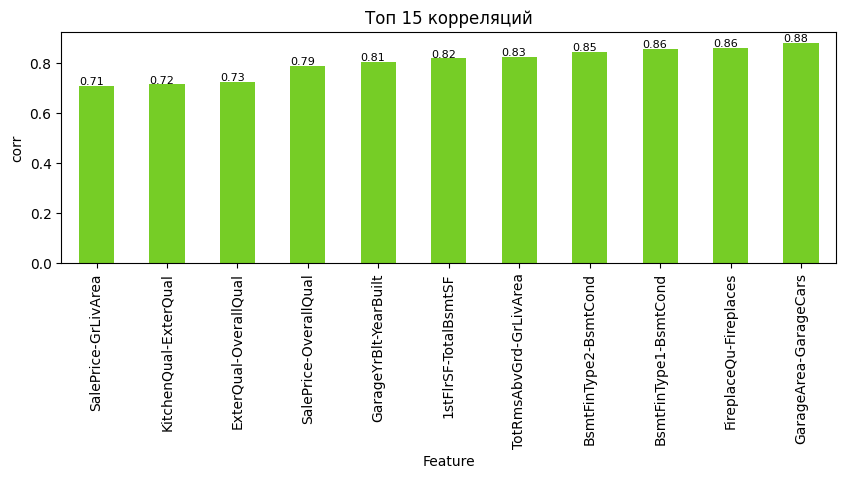

In [24]:
plt.figure(figsize=(10,3))
best_one = height_corr[height_corr.isin(sorted(height_corr.unique(), 
                                    reverse= True)[:15])]
best_one.plot(kind = 'bar', 
                                                               color = 'xkcd:apple green');
for index,data in enumerate(best_one):
    plt.text(x=index - 0.25, y = data + 0.005, s=f"{data:.{2}f}" , fontdict=dict(fontsize=8))
plt.title('Топ 15 корреляций')
plt.xlabel('Feature')
plt.ylabel('corr');

<div style="padding:15px 40px 5px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;">
    
**Самые высокие корреляции:**
    

- KitchenQual и OverallQual (0.67)
- TotRmsAbvGrd и BedroomAbvGr (0.67)
- **SalePrice** и ExterQual (0.68)
- **SalePrice** и GrLivArea (0.69)
- TotalBsmtSF и BsmtQual (0.71)
- KitchenQual и ExterQual (0.71)
- ExterQual и OverallQual (0.72)
- **SalePrice** и OverallQual (0.79)
- TotRmsAbvGrd и GrLivArea (0.82)
- TotalBsmtSF и BsmtCond (0.83)
- BsmtFinType2 и BsmtCond (0.84)
- BsmtExposure и BsmtCond (0.84)
- BsmtFinType1 и BsmtCond (0.85)
- FireplaceQu и Fireplaces (0.86)
- GarageArea и GarageCars (0.88)

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 

Ожидалось высокое значение корреляции для некоторых признаков, например, "MasVnrArea" и "MasVnrType", "GarageArea" и "GarageCars". Однако высокая корреляция не всегда желательна, и в результате высокой корреляции возникла мультиколлинеарность, поэтому мы удалим один из признаков с высокой корреляцией. Особое внимание следует уделить высокой корреляции, связанной с "SalePrice", поскольку это наша целевая переменная, которую мы будем предсказывать. Лучшую корреляцию показывает общее качество.

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Feature engineering.
</div>

In [25]:
# Thanks for https://www.kaggle.com/code/theupgrade/step-by-step-eda-lasso-lgbmr-stack/notebook

def FeatureEngineering(X):

    X['BsmtTotalBath'] = X['BsmtFullBath'] + [0 if x == 0 else x/2 for x in X['BsmtHalfBath']]
    X['TotalBath'] = X['FullBath'] + [0 if x == 0 else x/2 for x in X['HalfBath']]
    X['TotRmsNoBedNoKitchen'] = X['TotRmsAbvGrd'] - X['KitchenAbvGr'] - X['BedroomAbvGr']
    X['TotRmsNoBedNoKitchen'].loc[X['TotRmsNoBedNoKitchen']==8] = 7
    X['TotLivingArea'] = X['GrLivArea'] + X['TotalBsmtSF']
    X['OverallQual'].loc[X['OverallQual']==1] = 2
    X['GarageCars'] = X['GarageCars']
    X['GarageCars'].loc[X['GarageCars']==4] = 3
    
    
    X['InsidePorch'] = X['EnclosedPorch'] + X['3SsnPorch']+X['ScreenPorch']
    X['OutsidePorch'] = X['WoodDeckSF'] + X['OpenPorchSF']
    X['TotalClosedPorchSF'] = X['ScreenPorch'] + X['3SsnPorch'] + X['EnclosedPorch']
    X['TotalLivingAreaWithoutPorch'] = X['TotLivingArea'] - X['TotalClosedPorchSF']
    

    X['NumMoSold'] = X['MoSold']/120*9
    X['YrSoldAgo'] = 2011-X['YrSold']
    X['TimeSoldAgo'] = X['YrSoldAgo']+(1-(X['MoSold']/120*9))
    X['HasRemod'] = 0
    X['HasRemod'].loc[X['YearRemodAdd'] == X['YearBuilt']] = 1
    X['YearBuiltAgo'] = 2011 - X['YearBuilt']
    
    X['PercentFrontage'] = round(X['LotFrontage'] / X['LotArea'],5)

    X['HouseViewImpact'] = X['OverallCond'] * X['PercentFrontage']

    X['GarageCars'].loc[X['GarageCars'].isna()] = 1
    X['GarageCars'].loc[X['GarageCars'] == 0] = 1
    X['PlacePerCar'] = X['GarageArea'] / X['GarageCars']
    X['PlacePerCar'] = round(X['PlacePerCar'].astype(float),5)

    X['RatioOfFloors'] = round(X['2ndFlrSF'] / X['1stFlrSF'],5)
    X['TotalBsmtSF'].loc[X['TotalBsmtSF'] == 0] = 1
    X['RatioOfUnfBsmt'] = round(X['BsmtUnfSF'] / X['TotalBsmtSF'],5)
    X['GardenRatio'] = round(X['GrLivArea'] / X['LotArea'],5)
    X['AvgRoomSize'] = round(X['TotRmsAbvGrd'] / X['GrLivArea'],5)

    X['BedroomRatioSize'] = round(X['BedroomAbvGr'] / X['GrLivArea'],5)
    X['BedroomKitchenRatio'] = round(X['BedroomAbvGr'] / (X['KitchenAbvGr']+1),5)
    X['KitchenBathRatio'] = round(X['FullBath'] / (X['KitchenAbvGr']+1),5)
    X['KitchenGrAreaRatio'] = round(X['KitchenAbvGr'] / X['GrLivArea'],5)
    X['BedroomBathRatio'] = round(X['BedroomAbvGr'] / (X['FullBath']+1),5)
    X['RegularRoomsAbs'] = X['TotRmsAbvGrd'] - X['BedroomAbvGr'] - X['KitchenAbvGr']
    X['GrLivAreaRatioGarageBsmtSize'] = round(X['GrLivArea'] / (X['GarageArea'] + X['TotalBsmtSF'] + 1),5)
    X['BsmtRatio1stFlr'] = round(X['TotalBsmtSF'] / X['1stFlrSF'],5)

    
    X['BsmtSize'] = 0
    X.loc[X['TotalBsmtSF'] >= 2000 , "BsmtSize"] = 4
    X.loc[X['TotalBsmtSF'] < 2000 , "BsmtSize"] = 3
    X.loc[X['TotalBsmtSF'] <= 1350, "BsmtSize"] = 2
    X.loc[X['TotalBsmtSF'] <= 700, 'BsmtSize'] = 1

    X['LotAreaSize'] = 0
    X.loc[X['LotArea'] >= 25000 , "LotAreaSize"] = 5
    X.loc[X['LotArea'] < 25000 , "LotAreaSize"] = 4
    X.loc[X['LotArea'] <= 18000, "LotAreaSize"] = 3
    X.loc[X['LotArea'] <= 2500, 'LotAreaSize'] = 2
    X.loc[X['LotArea'] <= 1800 , "LotAreaSize"] = 1
    
    X['LivAreaSize'] = 0
    X.loc[X['GrLivArea'] >= 2750 , "LivAreaSize"] = 5
    X.loc[X['GrLivArea'] < 2750 , "LivAreaSize"] = 4
    X.loc[X['GrLivArea'] <= 2400, "LivAreaSize"] = 3
    X.loc[X['GrLivArea'] <= 850, 'LivAreaSize'] = 2
    X.loc[X['GrLivArea'] <= 750 , "LivAreaSize"] = 1
    
    
    X['FrontageSize'] = 0
    X.loc[X['LotFrontage'] >= 120 , "FrontageSize"] = 5
    X.loc[X['LotFrontage'] < 120 , "FrontageSize"] = 4
    X.loc[X['LotFrontage'] <= 100, "FrontageSize"] = 3
    X.loc[X['LotFrontage'] <= 40, 'FrontageSize'] = 2
    X.loc[X['LotFrontage'] <= 25 , "FrontageSize"] = 1
    
    X['AbsFrontageSize'] = 0
    X.loc[(X['LotFrontage'] / X['LotArea']) >= 0.0140 , "FrontageSize"] = 5
    X.loc[(X['LotFrontage'] / X['LotArea']) < 0.0140 , "FrontageSize"] = 4
    X.loc[(X['LotFrontage'] / X['LotArea']) <= 0.0120, "FrontageSize"] = 3
    X.loc[(X['LotFrontage'] / X['LotArea']) <= 0.0050, 'FrontageSize'] = 2
    X.loc[(X['LotFrontage'] / X['LotArea']) <= 0.0033 , "FrontageSize"] = 1
    
    for col in X.select_dtypes('bool').columns:
        
        X[col] = [1 if elem else 0 for elem in X[col]]
    
    return X


FeatureEng = Pipeline([("features", FunctionTransformer(FeatureEngineering))])
df_train = FeatureEng.fit_transform(df_train)

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Feature selection.
</div>

In [26]:
class Droping_Features(BaseEstimator, TransformerMixin):

    def __init__(self): pass

    def fit(self, X, y=None):

        self.drop_features = ['GarageCars', 'BsmtCond', 'YearBuilt', 'YearRemodAdd',
                              'YrSold', 'MoSold', 'GarageYrBlt', 'NumMoSold', 'YrSoldAgo',
                              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF', 'OpenPorchSF',
                              'PoolArea', 'TotalBsmtSF', 'BsmtFinSF1']

        for col in X.columns:
            if col in self.drop_features:
                continue
            if len(X[col].unique()) in [0, 1]:
                self.drop_features.append(col)
            
            
        return self

    def transform(self, X, y=None):
        drop = self.drop_features

        if "SalePrice" in drop:
            drop.remove("SalePrice")
            
        return X.drop(drop, axis = 1)


FeaturesDel = Pipeline([("Drop", Droping_Features())])
df_train = FeaturesDel.fit_transform(df_train)

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Scaling.
</div>

In [27]:
class XScaling(BaseEstimator, TransformerMixin):
    def __init__(self, scaler=RobustScaler()):
        
        self.scaler = scaler

    def fit(self, X, y=None):
        
        columns = [elem for elem in X.drop("SalePrice", axis = 1).select_dtypes(['int64', 'float64']).columns]

        self.num_columns = [elem for elem in columns
                            if elem[:3] != 'Has' and [0, 1] != X[elem].unique().tolist()
                            and [0] != X[elem].unique().tolist() and [1] != X[elem].unique().tolist()]

        self.scaler = self.scaler.fit(X[self.num_columns])
        return self

    def transform(self, X, y=None):
        
        X[self.num_columns] = self.scaler.transform(X[self.num_columns])
        return X
        


Scaling = Pipeline([('Scaling', XScaling())])
df_train = Scaling.fit_transform(df_train)

In [28]:
class Logarithmize(BaseEstimator, TransformerMixin):
    def __init__(self): pass
    def fit(self, X, y = None):
        self.num_columns = X.drop("SalePrice", axis = 1).select_dtypes(include=['int64', 'float64']).columns.tolist()
        self.transformer = PowerTransformer().fit(X[self.num_columns])
        return self
    def transform(self, X, y = None):
        if "SalePrice" in X.columns:
            X["SalePrice"] = np.log(X["SalePrice"] + 1)
        X[self.num_columns] = self.transformer.transform(X[self.num_columns])
        return X


Loging = Pipeline([('Logarithmize', Logarithmize())])
df_train = Loging.fit_transform(df_train)

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Финальная обработка.
</div>

In [29]:
final_pipeline = Pipeline([('1', Imputing),
                           ('3', Encoder),
                           ('5', FeatureEng),
                           ('6', FeaturesDel),
                           ('7', Scaling),
                           ('2', Loging),])

In [30]:
df_test = final_pipeline.transform(df_test)

In [31]:
features = df_train.drop('SalePrice', axis = 1)
target = df_train['SalePrice']

In [32]:
global_features_train, global_features_valid, global_target_train, global_target_valid = \
train_test_split(features, target, test_size=0.2, random_state=1234)

In [33]:
results = {}

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Modeling.
</div>

In [34]:
def RMSE(target, predict):
    return np.sqrt(mean_squared_error(target, predict))

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## CatBoost.
</div>

In [35]:
best_catboost_params =  {'iterations': 407,
                        'learning_rate': 0.0714974652541214,
                        'depth': 6,
                        'l2_leaf_reg': 1.6787979088525253e-06,
                        'bootstrap_type': 'Bernoulli',
                        'random_strength': 0.0005608621951116625,
                        'od_type': 'IncToDec',
                        'od_wait': 45,
                        'subsample': 0.5388540817834404,
                        'random_seed': 1234,
                        'verbose': False,
                        'eval_metric': 'RMSE'}

In [36]:
catboost = CatBoostRegressor(**best_catboost_params)
catboost.fit(global_features_train, global_target_train, 
          use_best_model = True, 
          eval_set = (global_features_valid, 
                      global_target_valid),
          early_stopping_rounds = 10)

pred = catboost.predict(global_features_valid)
results['CatBoost'] = RMSE(global_target_valid, pred)

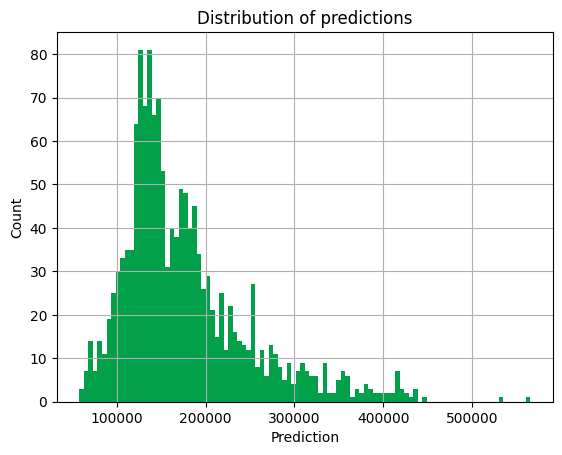

In [37]:
pd.Series(np.exp(catboost.predict(df_test))).hist(bins = 100, color = 'xkcd:emerald')
plt.title('Distribution of predictions')
plt.ylabel('Count')
plt.xlabel('Prediction');

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 

**CatBoost: оценка на тестовых данных 0.132.**

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## LightGBM.
</div>

In [38]:
best_lgb_params = {'num_leaves': 426,
                   'learning_rate': 0.07978440321682802,
                   'feature_fraction': 0.30698621593245756,
                   'bagging_fraction': 0.15777217068806862,
                   'min_data_in_leaf': 50,
                   'random_state': 1234,
                   'objective': 'regression',
                   'metric': 'rmse',
                   'boosting_type': 'gbdt'}

In [39]:
lgbm = LGBMRegressor(**best_lgb_params)
lgbm.fit(global_features_train, global_target_train,
          eval_set=[(global_features_valid, 
                      global_target_valid)],
          early_stopping_rounds=100,
          verbose=False)

pred = lgbm.predict(global_features_valid)
results['LGBM'] = RMSE(global_target_valid, pred)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.30698621593245756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30698621593245756
[LightGBM] [Warning] bagging_fraction is set=0.15777217068806862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15777217068806862


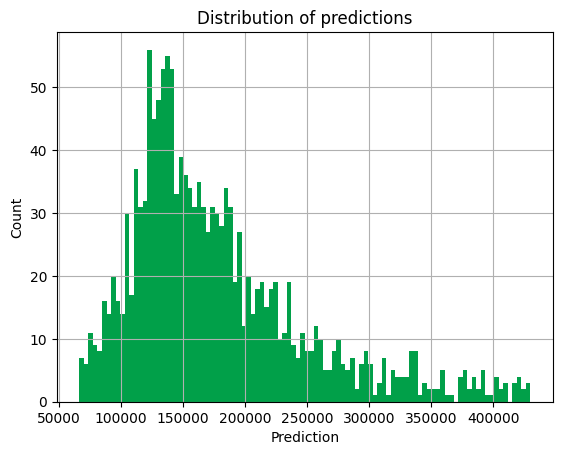

In [40]:
pd.Series(np.exp(lgbm.predict(df_test))).hist(bins = 100, color = 'xkcd:emerald')
plt.title('Distribution of predictions')
plt.ylabel('Count')
plt.xlabel('Prediction');

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 

**LightGBM: оценка на тестовых данных 0.138.**

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## RandomForest.
</div>

In [41]:
best_rf_params = {'n_estimators': 474,
                  'max_depth': 18,
                  'min_samples_split': 2,
                  'min_samples_leaf': 1,
                  'random_state': 1234,
                  'n_jobs': -1}

In [42]:
rf = RandomForestRegressor(**best_rf_params)
rf.fit(global_features_train, global_target_train)
results['RandomForest'] = RMSE(global_target_valid, rf.predict(global_features_valid))

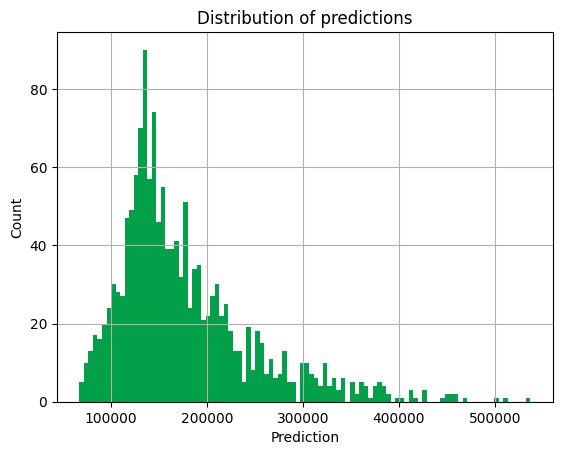

In [43]:
pd.Series(np.exp(rf.predict(df_test))).hist(bins = 100, color = 'xkcd:emerald')
plt.title('Distribution of predictions')
plt.ylabel('Count')
plt.xlabel('Prediction');

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 

**RandomForest: оценка на тестовых данных 0.151.**

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## XGBoost.
</div>

In [44]:
best_xgb_params = {'n_estimators': 853,
 'learning_rate': 0.020762190988392357,
 'max_depth': 13,
 'min_child_weight': 14,
 'subsample': 0.5284688960404623,
 'colsample_bytree': 0.3558828251494616,
 'gamma': 0.10649975333432488,
 'reg_alpha': 0.02486731258229513,
 'reg_lambda': 1.3641765890246924,
 'random_state': 1234,
 'objective': 'reg:squarederror'}

In [45]:
xgb = XGBRegressor(**best_xgb_params)
xgb.fit(global_features_train, global_target_train)
results['XGB'] = RMSE(global_target_valid, xgb.predict(global_features_valid))

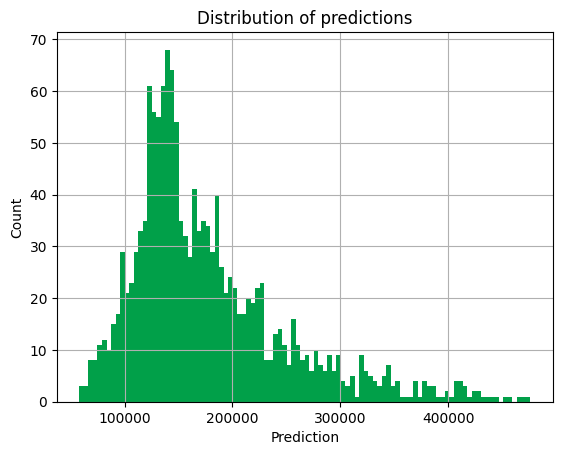

In [46]:
pd.Series(np.exp(xgb.predict(df_test))).hist(bins = 100, color = 'xkcd:emerald')
plt.title('Distribution of predictions')
plt.ylabel('Count')
plt.xlabel('Prediction');

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 

**XGBM: оценка на тестовых данных 0.136.**

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Linears
</div>

In [47]:
best_ridge_params = {'alpha': 87.60679546235764, 'random_state': 1234}

In [48]:
best_lasso_params = {'alpha': 0.0031841753487689816, 'random_state': 1234}

In [49]:
lasso = Lasso(**best_lasso_params)
lasso.fit(global_features_train, global_target_train)
results['Lasso'] = RMSE(global_target_valid, lasso.predict(global_features_valid))

In [50]:
ridge = Ridge(**best_ridge_params)
ridge.fit(global_features_train, global_target_train)
results['Ridge'] = RMSE(global_target_valid, ridge.predict(global_features_valid))

In [51]:
lr = LinearRegression()
lr.fit(global_features_train, global_target_train)
results['LReg'] = RMSE(global_target_valid, lr.predict(global_features_valid))

In [52]:
np.sum(np.abs(np.exp(lr.predict(df_test)) - np.exp(ridge.predict(df_test))))

6001509.407271117

In [53]:
np.sum(np.abs(np.exp(lr.predict(df_test)) - np.exp(lasso.predict(df_test))))

7192469.484079244

In [54]:
np.sum(np.abs(np.exp(lasso.predict(df_test)) - np.exp(ridge.predict(df_test))))

3367786.118675551

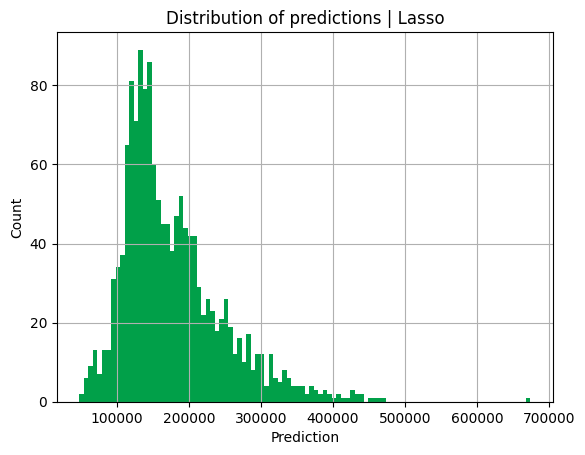

In [55]:
pd.Series(np.exp(lasso.predict(df_test))).hist(bins = 100, color = 'xkcd:emerald')
plt.title('Distribution of predictions | Lasso')
plt.ylabel('Count')
plt.xlabel('Prediction');

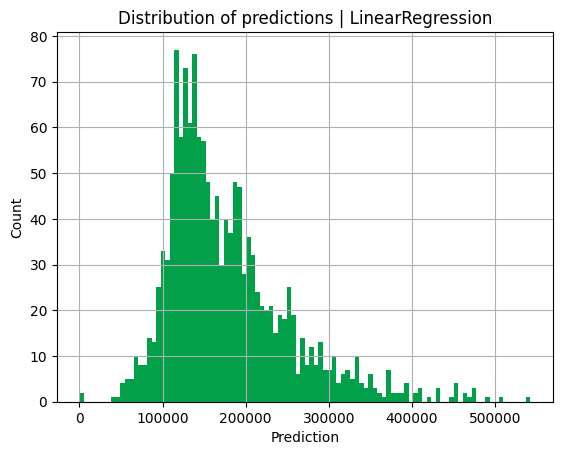

In [56]:
pd.Series(np.exp(lr.predict(df_test))).hist(bins = 100, color = 'xkcd:emerald')
plt.title('Distribution of predictions | LinearRegression')
plt.ylabel('Count')
plt.xlabel('Prediction');

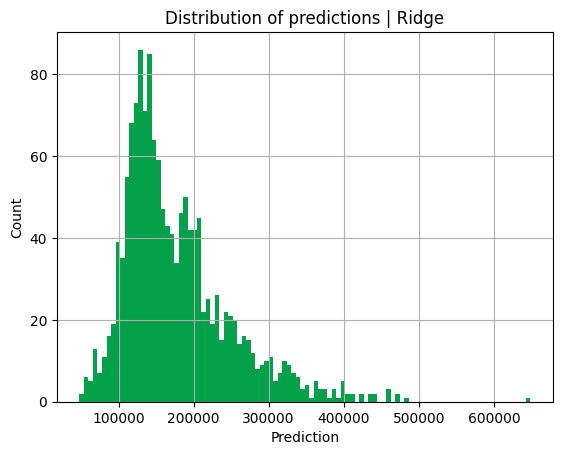

In [57]:
pd.Series(np.exp(ridge.predict(df_test))).hist(bins = 100, color = 'xkcd:emerald')
plt.title('Distribution of predictions | Ridge')
plt.ylabel('Count')
plt.xlabel('Prediction');

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
Будем использовать медиану предсказаний от линейной регрессии, Lasso и Ridge.

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 

**LR|Lasso|Ridge: оценка на тестовых данных 0.133.**

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## MLP.
</div>

In [58]:
best_mlp_params = {'alpha': 0.01892283964622647,
                   'learning_rate_init': 0.05475123614236973,
                   'power_t': 0.15070456785140177,
                   'activation': 'relu',
                   'solver': 'adam',
                   'batch_size': 'auto',
                   'learning_rate': 'constant',
                   'max_iter': 1000,
                   'hidden_layer_sizes': [32, 80, 45, 16, 79]}

In [59]:
mlp = MLPRegressor(**best_mlp_params)
mlp.fit(global_features_train, global_target_train)
results['MLP'] = RMSE(global_target_valid, mlp.predict(global_features_valid))

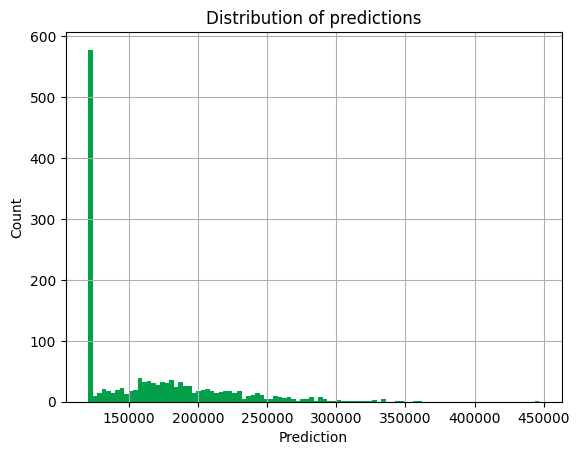

In [60]:
pd.Series(np.exp(mlp.predict(df_test))).hist(bins = 100, color = 'xkcd:emerald')
plt.title('Distribution of predictions')
plt.ylabel('Count')
plt.xlabel('Prediction');

<div style="padding:10px 40px 10px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 

Модель MLP показывает плохие результаты.

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Stacking.
</div>

In [61]:
stacking = StackingCVRegressor(regressors=[catboost, xgb, lgbm, 
                                           rf, ridge, lasso, lr, 
                                           CatBoostRegressor(verbose = False)],
                               shuffle=True,
                               cv=KFold(n_splits=10),
                               meta_regressor = CatBoostRegressor(**best_catboost_params))

stacking.fit(global_features_train, global_target_train)
results['Stacking'] = RMSE(global_target_valid, stacking.predict(global_features_valid))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.30698621593245756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30698621593245756
[LightGBM] [Warning] bagging_fraction is set=0.15777217068806862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15777217068806862
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.30698621593245756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30698621593245756
[LightGBM] [Warning] bagging_fraction is set=0.15777217068806862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15777217068806862
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] fea

<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

## Voiting.
</div>

In [62]:
models = [("CatBoost", catboost), ("XGB", xgb), ("LGBM", lgbm), 
          ("RF", rf), ('Lasso', lasso), ('Ridge', ridge), ("LR", lr),
          ("SimpleCB", CatBoostRegressor(verbose = False))]

voiting = VotingRegressor(estimators=models)

voiting.fit(global_features_train, global_target_train)
results['Voiting'] = RMSE(global_target_valid, voiting.predict(global_features_valid))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.30698621593245756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30698621593245756
[LightGBM] [Warning] bagging_fraction is set=0.15777217068806862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15777217068806862


<div style="padding:0px 40px 20px; 
            color:#004346;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Submission.
</div>

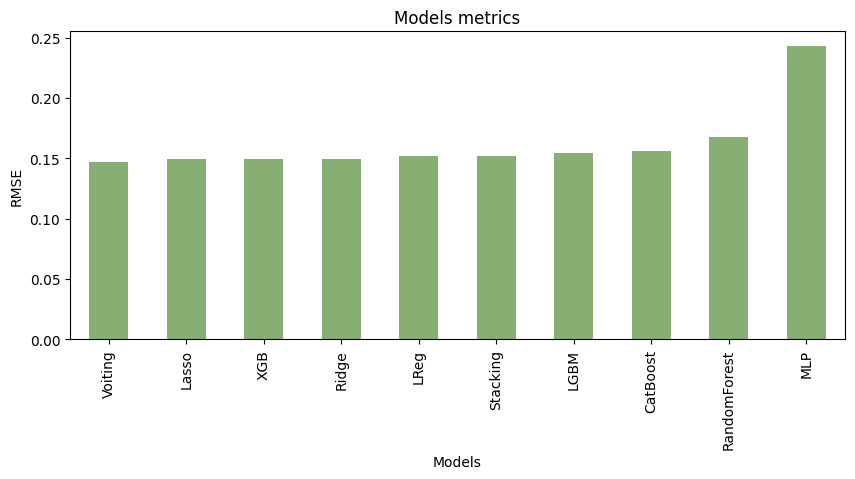

In [63]:
plt.figure(figsize=(10, 4))
pd.Series(results).sort_values().plot(kind = 'bar', color = 'xkcd:sage')
plt.xlabel('Models')
plt.ylabel("RMSE")
plt.title('Models metrics');

In [64]:
Linear_pred = np.array([np.median([np.exp(ridge.predict(df_test))[i], 
               np.exp(lasso.predict(df_test))[i],
               np.exp(lr.predict(df_test))[i]]) for i in range(len(df_test))])

models = {"CatBoost":catboost, "XGB":xgb, "LGBM":lgbm,
         "RF":rf, "Voiting": voiting, "Stacking": stacking,
         'Lasso_Ridge_LR': Linear_pred}

In [65]:
final_predict = 0
coef_sum = 0

models_coef = {"CatBoost":(0.2125), "XGB":(0.1), "LGBM":(0.1),
               "RF":(0.075), "Voiting": (0.15), "Stacking": (0.1875), 
               'Lasso_Ridge_LR': (0.175)}

for model in models.keys():
    if model == "Lasso_Ridge_LR":
        final_predict +=  Linear_pred * models_coef[model]
        coef_sum += models_coef[model]
        continue
        
    coef_sum += models_coef[model]
    final_predict += models_coef[model] * np.exp(models[model].predict(df_test)) + 1
    
coef_sum

1.0

In [66]:
pd.DataFrame({'Id': df_test.index, 'SalePrice': final_predict}).to_csv('submission.csv',index = False)
pd.read_csv('submission.csv')

,Id,SalePrice
0,1461,118183.627960
1,1462,161452.273881
2,1463,179590.519549
3,1464,190252.534121
4,1465,182036.146484
...,...,...
1454,2915,89161.714124
1455,2916,83870.861369
1456,2917,166530.772342
1457,2918,118115.946676


<div style="padding:0px 40px 30px; 
            color:#004346;
            font-size:200%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:10000;"> 
    
<h1 style = "text-align:center;font-size:40px;"> Конченый результат на тестовой выборке: 0.129 </h1>  